# METAC DATA PREP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import seaborn as sns
import math
import os
import glob

import pyhgf

# Load Data

- [x] behavioural data (Island Jumping Task)
- [x] slider position logs (IJT)
- [x] physiological data (Island Jumping Task)
- TNUSurvey (and/or REDCap)
    - [x] online prescreening data
    - [x] online questionnaire data 
- REDCap
    - [x] experiment day questionnaires
    - [x] debriefing

In [2]:
# load PPID file

ids = pd.read_csv(r"data\metac_ppids_exploration_task_v3_1.txt")

#print(ids['PPID'])
print(ids.size)

# def basedir
#b_basedir = r"T:\METAC\behavior\raw\Temporary" # rawTransfer
b_basedir = r"R:\METAC\behavior\raw" # bluebay

10


In [3]:
# TEMP load slider logui

# path root
l_fname = "behavior\\task\\*.logui"

# init list
f = list()
l_colnames = ['date', 'time', 'ui', 'value']

# loop over ppids
for idx, val in enumerate(ids['PPID']):
    
    # get path to .csv task files
    ppid = "TNU_METAC_" + str(val)
    l_fullpath = os.path.join(b_basedir, ppid, l_fname)
    print(l_fullpath)
    
    # load task data (experiment)
    for l_file in glob.glob(l_fullpath):
        if l_file.find("experiment") != -1:

            print(l_file)
    
            # responses
            l_dat = pd.read_csv(l_file, skiprows=range(6), nrows=5) #, names=l_colnames, header=None)
            print(l_dat.shape)
            print(l_dat.values)


# l_file = r"data\TNU_METAC_9999_breathtest_240624_1029.logui"
# l_colnames = ['date', 'time', 'ui', 'value']

# l_temp = pd.read_csv(l_file, skiprows=range(6), nrows=5) #, names=l_colnames, header=None)
# l_temp.values

R:\METAC\behavior\raw\TNU_METAC_1014\behavior\task\*.logui
R:\METAC\behavior\raw\TNU_METAC_1014\behavior\task\TNU_METAC_1014_experiment_241021_1011.logui
(5, 1)
[['[24/10/21 10:11:58.044] (slider) 0.279']
 ['[24/10/21 10:11:58.051] (slider) 0.284']
 ['[24/10/21 10:11:58.063] (slider) 0.291']
 ['[24/10/21 10:11:58.080] (slider) 0.299']
 ['[24/10/21 10:11:58.092] (slider) 0.307']]
R:\METAC\behavior\raw\TNU_METAC_1015\behavior\task\*.logui
R:\METAC\behavior\raw\TNU_METAC_1015\behavior\task\TNU_METAC_1015_experiment_241022_1423.logui
(5, 1)
[['[24/10/22 14:23:36.298] (slider) 0.492']
 ['[24/10/22 14:23:36.305] (slider) 0.495']
 ['[24/10/22 14:23:36.312] (slider) 0.498']
 ['[24/10/22 14:23:36.328] (slider) 0.500']
 ['[24/10/22 14:23:36.344] (slider) 0.503']]
R:\METAC\behavior\raw\TNU_METAC_1017\behavior\task\*.logui
R:\METAC\behavior\raw\TNU_METAC_1017\behavior\task\TNU_METAC_1017_experiment_241031_1011.logui
(5, 1)
[['[24/10/31 10:11:50.792] (slider) 0.604']
 ['[24/10/31 10:11:50.798] (sli

In [4]:
# load REDCap data

r_basedir = r"P:\METAC_Iglesias\Data"
r_fname = "METAC1_DATA_*.csv"

r_fullpath = os.path.join(r_basedir, r_fname)
r_file = glob.glob(r_fullpath)
print(r_file)

r_temp = pd.read_csv(r_file[0])#, skiprows=range(10), names=p_colnames, header=None)
list(r_temp.columns.values)

['P:\\METAC_Iglesias\\Data\\METAC1_DATA_2024-11-19_1133.csv']


['ppid',
 'redcap_event_name',
 'redcap_repeat_instrument',
 'redcap_repeat_instance',
 'redcap_survey_identifier',
 'ic_source___1',
 'ic_source___2',
 'ic_source___3',
 'ic_source___4',
 'ic_source___na',
 'ic_source___nad',
 'ic_source___nac',
 'ic_source___nd',
 'ic_source___unk',
 'ic_source___ano',
 'ic_pid',
 'ic_location',
 'ic_version',
 'ic_incidental_findings',
 'ic_inform_doctor',
 'ic_available',
 'ic_included',
 'ic_notes',
 'ic_ae',
 'informed_consent_complete',
 'further_use_source___1',
 'further_use_source___2',
 'further_use_source___3',
 'further_use_source___4',
 'further_use_source___na',
 'further_use_source___nad',
 'further_use_source___nac',
 'further_use_source___nd',
 'further_use_source___unk',
 'further_use_source___ano',
 'fur_use_pid',
 'fur_use_withdrawal_study',
 'fur_use_discontinuation',
 'reason_discontinuation',
 'fur_use_data',
 'fur_use_withdrawal',
 'fur_use_personal',
 'fur_use_personal_project___1',
 'fur_use_personal_project___2',
 'fur_use_p

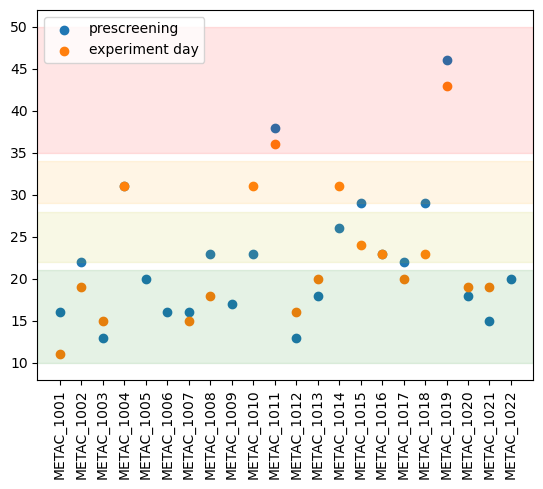

In [5]:
plt.scatter(r_temp['ppid'], r_temp['fas_total_score'])
plt.scatter(r_temp['ppid'], r_temp['fas_exp_total_score'])
plt.xticks(rotation=90)
plt.legend(('prescreening', 'experiment day'))
plt.axhspan(10,21,alpha=0.1, color='g')
plt.axhspan(22,28,alpha=0.1, color='y')
plt.axhspan(29,34,alpha=0.1, color='orange')
plt.axhspan(35,50,alpha=0.1, color='r')

plt.savefig(os.path.join("figures", "prescreening_exp_fas.png"))

0      11.0
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
227     NaN
228     NaN
229     NaN
230     NaN
231     NaN
Name: fas_exp_total_score, Length: 232, dtype: float64


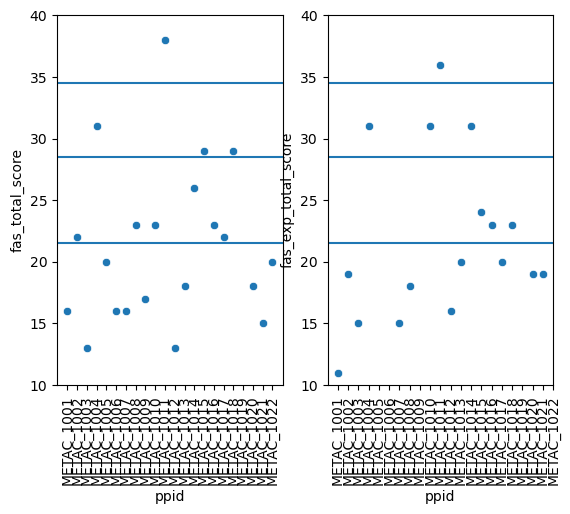

In [6]:
r_temp['ppid']
r_temp['psqi_score']
r_temp['debrief_source_data___4']
r_temp['fas_total_score']
print(r_temp['fas_exp_total_score'])
r_temp['mfis_exp_total_score']

# Create a visualization
f, axes = plt.subplots(1, 2)
sns.scatterplot(data=r_temp, x="ppid", y="fas_total_score", ax=axes[0])
sns.scatterplot(data=r_temp, x="ppid", y="fas_exp_total_score", ax=axes[1])
for k in range(0, axes.shape[0]):
    axes[k].tick_params(axis='x', rotation=90)
    axes[k].axhline(21.5)
    axes[k].axhline(28.5)
    axes[k].axhline(34.5)
    axes[k].set(ylim=(10,40))

In [7]:
# load physiology data
###b_basedir = r"T:\METAC\behavior\raw\Temporary"
p_fname = "behavior\\LabChart\\*task_formatted.csv"
ps_fname = "behavior\\LabChart\\*specs.json"
pf_fname = "behavior\\LabChart\\*task_full.csv"

# loop over ppids
for idx, val in enumerate(ids['PPID']):
    
    # get path to formatted .csv task physiology files
    ppid = "TNU_METAC_" + str(val)
    p_fullpath = os.path.join(b_basedir, ppid, p_fname)
    for p_file in glob.glob(p_fullpath):


        print(str(p_file))

        # p_colnames = ['t', 'M', 'Pulse', 'T', 'O2', 'CO2', 'F', 'V']
        # p_temp = pd.read_csv(p_file, names=p_colnames)
        p_temp = pd.read_csv(p_file)
        
        print(list(p_temp.columns.values))

    
    # get path to specs.json files
    ps_fullpath = os.path.join(b_basedir, ppid, ps_fname)
    for ps_file in glob.glob(ps_fullpath):

        print(str(ps_file))
    
        ps_temp = pd.read_json(ps_file, typ='series')
        print(ps_temp)
    
        print(ps_temp.comment_txt)
        print(ps_temp.comment_t[2])
        print(ps_temp.comment_t[3])


    # pf_fullpath = os.path.join(b_basedir, ppid, pf_fname)
    # for pf_file in glob.glob(pf_fullpath):
    #     print(str(pf_file))
    #     pf_temp = pd.read_csv(pf_file)

R:\METAC\behavior\raw\TNU_METAC_1010\behavior\LabChart\TNU_METAC_1010_task_formatted.csv
['Mouth Pressure', 'Pulse', 'Resistance Trigger', 'O2', 'CO2', 'Spirometer (Flow)', 'Spirometer (Volume)', 'time', 'id']
R:\METAC\behavior\raw\TNU_METAC_1010\behavior\LabChart\TNU_METAC_1010_task_specs.json
rangemin       [-416.3733797117464, -2, -10, -100, -10, -1.15...
rangemax       [420.7820915701583, 2, 10, 100, 10, 1.88309514...
units                 [mmHg, V   , V   , %O2 , %CO2, L/s , L   ]
samplerate            [1000, 1000, 1000, 1000, 1000, 1000, 1000]
comment_t                    [239949, 446749, 466249, 2980749.0]
comment_txt    [start breathing test, stop breathing test , s...
dtype: object
['start breathing test', 'stop breathing test ', 'start experiment    ', 'stop experiment     ']
466249
2980749.0


In [8]:
p_temp

Mouth Pressure     Pulse  Resistance Trigger         O2       CO2  \
0              0.595448 -0.009375            0.003125  15.543750  3.602813   
1              0.595448 -0.010125            0.002813  15.550000  3.603125   
2              0.608528 -0.010750            0.002813  15.546875  3.603125   
3              0.608528 -0.011188            0.002500  15.550000  3.602500   
4              0.608528 -0.011437            0.002500  15.556250  3.603437   
...                 ...       ...                 ...        ...       ...   
2514496        0.530045 -0.015500            0.002813  20.778126  0.146875   
2514497        0.530045 -0.015375            0.003125  20.775000  0.146563   
2514498        0.516964 -0.015313            0.003437  20.775000  0.145625   
2514499        0.516964 -0.015250            0.003437  20.778126  0.145000   
2514500        0.503884 -0.015250            0.003437  20.778126  0.144688   

         Spirometer (Flow)  Spirometer (Volume)      time  id  
0                -0.458014             0.331441   466.248   1  
1                -0.457837             0.330983   466.249   1  
2                -0.458191             0.330524   466.250   1  
3                -0.458014             0.330066   466.251   1  
4                -0.458191             0.329608   466.252   1  
...                    ...                  ...       ...  ..  
2514496          -0.372214             0.670889  2980.744   1  
2514497          -0.372568             0.670516  2980.745   1  
2514498          -0.372568             0.670144  2980.746   1  
2514499          -0.372568             0.669771  2980.747   1  
2514500          -0.372568             0.669399  2980.748   1  

[2514501 rows x 9 columns]

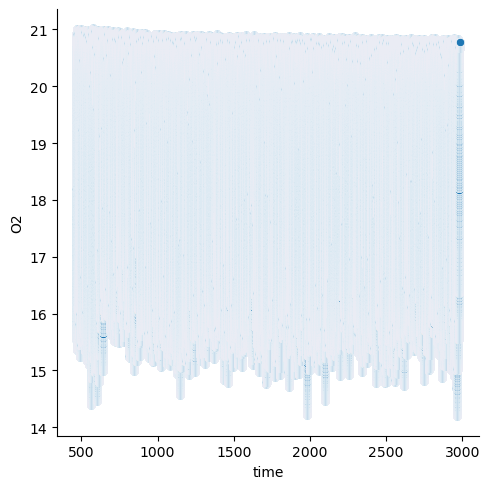

In [9]:
sns.relplot(data=p_temp, x="time", y="O2")

In [6]:
## BEHAVIOURAL DATA

ids = pd.read_csv(r"data\metac_ppids_exploration_task_v3_1.txt")

# path root
### b_basedir = r"T:\METAC\behavior\raw\Temporary" # rawTransfer
t_fname = "behavior\\task\\*.csv"
q_basedir = r"R:\METAC\questionnaires\raw" # bluebay ###r"T:\METAC\questionnaires\raw\Temporary"# rawTransfer
q_fname = "OnlineQuestionnaires\\*.csv"

# init list
f = list()

# loop over ppids
for idx, val in enumerate(ids['PPID']):
    
    # get path to .csv task files
    ppid = "TNU_METAC_" + str(val)
    t_fullpath = os.path.join(b_basedir, ppid, t_fname)
    print(t_fullpath)
    
    # load task data (experiment)
    for t_file in glob.glob(t_fullpath):
        if t_file.find("experiment") != -1:

            # aversiveness rating
            try:
                aversiveness = pd.read_csv(t_file, skiprows=range(83))
                av = aversiveness.to_numpy()
            except:
                av = math.nan
    
            print(av)
    
            # task settings
            specifications = pd.read_csv(t_file, nrows=1)
            specifications.insert(0, "pseudo_id", idx) # add sub idx
            specifications.insert(15, "aversiveness", av) # add aversiveness rating
    
            # repeat rows
            n_trials = specifications.values[0,1]
            t_specs80 = pd.DataFrame(np.repeat(specifications.values, n_trials, axis=0))
            t_specs80.columns = specifications.columns
            print(t_specs80.shape)
            
            tmp_specs = specifications.to_numpy()
            tmp_specs = np.repeat(tmp_specs, repeats = n_trials, axis=0)
    
            # responses
            t_dat = pd.read_csv(t_file, skiprows=[0,1,83,84]) # skip task specs and single aversiveness rating (if there)
            print(t_dat.shape)

    # load questionnaire data
    q_fullpath = os.path.join(q_basedir, ppid, q_fname)
    for q_file in glob.glob(q_fullpath):
        if q_file.find("Questionnaires") != -1:

            print(q_file)
            q_temp = pd.read_csv(q_file)
        
            # repeat rows
            q_dat = q_temp.loc[q_temp.index.repeat(n_trials)].reset_index(drop=True)
            print(q_dat.shape) 

    # concatenate arrays (t_reponses + t_specifications + quest)
    dat = pd.concat([t_dat, t_specs80, q_dat], axis=1)
    print(dat.shape)
    
    # append list for each subject
    f.append(dat)
    

# concatenate data frames from individual subjects
df = pd.concat(f, ignore_index=True)
print(df.shape)

R:\METAC\behavior\raw\TNU_METAC_1014\behavior\task\*.csv
nan
(80, 16)
(80, 14)
R:\METAC\questionnaires\raw\TNU_METAC_1014\OnlineQuestionnaires\TNU_METAC_1014_Questionnaires.csv
(80, 390)
(80, 420)
R:\METAC\behavior\raw\TNU_METAC_1015\behavior\task\*.csv
nan
(80, 16)
(80, 14)
R:\METAC\questionnaires\raw\TNU_METAC_1015\OnlineQuestionnaires\TNU_METAC_1015_Questionnaires.csv
(80, 390)
(80, 420)
R:\METAC\behavior\raw\TNU_METAC_1017\behavior\task\*.csv
nan
(80, 16)
(80, 14)
R:\METAC\questionnaires\raw\TNU_METAC_1017\OnlineQuestionnaires\TNU_METAC_1017_Questionnaires.csv
(80, 390)
(80, 420)
R:\METAC\behavior\raw\TNU_METAC_1016\behavior\task\*.csv
nan
(80, 16)
(80, 14)
R:\METAC\questionnaires\raw\TNU_METAC_1016\OnlineQuestionnaires\TNU_METAC_1016_Questionnaires.csv
(80, 390)
(80, 420)
R:\METAC\behavior\raw\TNU_METAC_1019\behavior\task\*.csv
nan
(80, 16)
(80, 14)
R:\METAC\questionnaires\raw\TNU_METAC_1019\OnlineQuestionnaires\TNU_METAC_1019_Questionnaires.csv
(80, 390)
(80, 420)
R:\METAC\behavi

In [42]:
print(t_fullpath)
for t_file in glob.glob(t_fullpath):
        if t_file.find("experiment") != -1:

            # aversiveness rating
            try:
                aversiveness = pd.read_csv(t_file, skiprows=range(83))
                av = aversiveness.to_numpy()
            except:
                av = math.nan

print(av)

R:\METAC\behavior\raw\TNU_METAC_1012\behavior\task\*.csv
nan


In [1]:
# NEW PILOT ON RAWTRANSFER

# init list
f = list()
    
# get path to .csv task files
t_fullpath = r"T:\METAC\behavior\raw\Temporary\TNU_METAC_1012\behavior\task\*.csv"
print(t_fullpath)

# load task data (experiment)
for t_file in glob.glob(t_fullpath):
    if t_file.find("experiment") != -1:

        # aversiveness rating
        try:
            aversiveness = pd.read_csv(t_file, skiprows=range(83))
            av = aversiveness.to_numpy()
        except:
            av = math.nan

        print(av)

        # task settings
        specifications = pd.read_csv(t_file, nrows=1)
        specifications.insert(0, "pseudo_id", idx) # add sub idx
        specifications.insert(15, "aversiveness", av) # add aversiveness rating

        # repeat rows
        n_trials = specifications.values[0,0] #get nTrials stored in data file
        t_specs80 = pd.DataFrame(np.repeat(specifications.values, n_trials, axis=0))
        t_specs80.columns = specifications.columns
        print(t_specs80.shape)
        
        tmp_specs = specifications.to_numpy()
        tmp_specs = np.repeat(tmp_specs, repeats = n_trials, axis=0)

        # responses
        t_dat = pd.read_csv(t_file, skiprows=[0,1,83,84])
        print(t_dat.shape)


# concatenate arrays (t_reponses + t_specifications + quest)
dat = pd.concat([t_dat, t_specs80], axis=1)
print(dat.shape)

# append list for each subject
f.append(dat)
    

# concatenate data frames from individual subjects
df = pd.concat(f, ignore_index=True)
print(df.shape)

T:\METAC\behavior\raw\Temporary\TNU_METAC_1012\behavior\task\*.csv


NameError: name 'glob' is not defined

In [10]:
# Seaborn: apply the default theme
sns.set_theme()

# print column names of df
c_names = list(df.columns.values)
print(c_names)

['trial#', ' iWidth', ' iDistance', ' wind', ' jAngle', ' jStrengthFactor', ' jSuccess', ' prediction', ' control', ' handling', ' tolerance', ' aversiveness', ' tStart', ' b1Duration', 'pseudo_id', 'trialNo', ' jumpOnly', ' sequence', ' lang', ' mode', ' angleLimit', ' distanceMin', ' distanceMax', ' widthS', ' widthL', ' jumpStrength', ' windStrength', ' sceneWidth', ' sceneHeight', 'aversiveness', 'id', 'submitdate', 'lastpage', 'startlanguage', 'seed', 'token', 'startdate', 'datestamp', 'studyinfo', 'birthyear', 'gender', 'informedconsent', 'PHQ8[PHQ81]', 'PHQ8[PHQ82]', 'PHQ8[PHQ83]', 'PHQ8[PHQ84]', 'PHQ8[PHQ85]', 'PHQ8[PHQ86]', 'PHQ8[PHQ87]', 'PHQ8[PHQ88]', 'StaitAllQuestions[STAIT01]', 'StaitAllQuestions[STAIT02]', 'StaitAllQuestions[STAIT03]', 'StaitAllQuestions[STAIT04]', 'StaitAllQuestions[STAIT05]', 'StaitAllQuestions[STAIT06]', 'StaitAllQuestions[STAIT07]', 'StaitAllQuestions[STAIT08]', 'StaitAllQuestions[STAIT09]', 'StaitAllQuestions[STAIT10]', 'StaitAllQuestions[STAIT11]',

&nbsp;
### Raw Behavioural Responses over trials

- success
- prediction
- control rating

In [11]:
min(df[' prediction'][160:239])

0.0

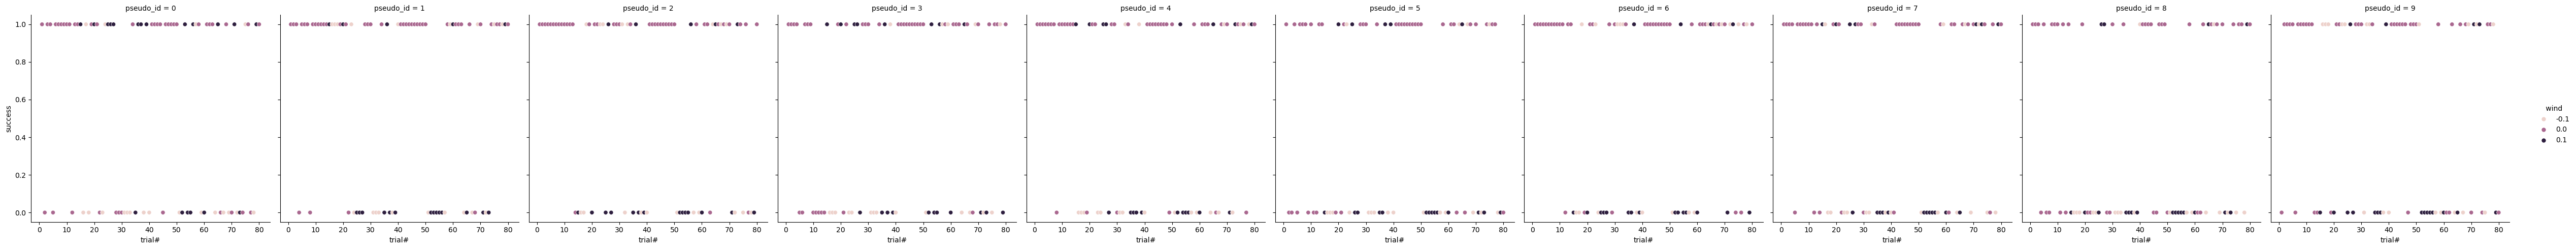

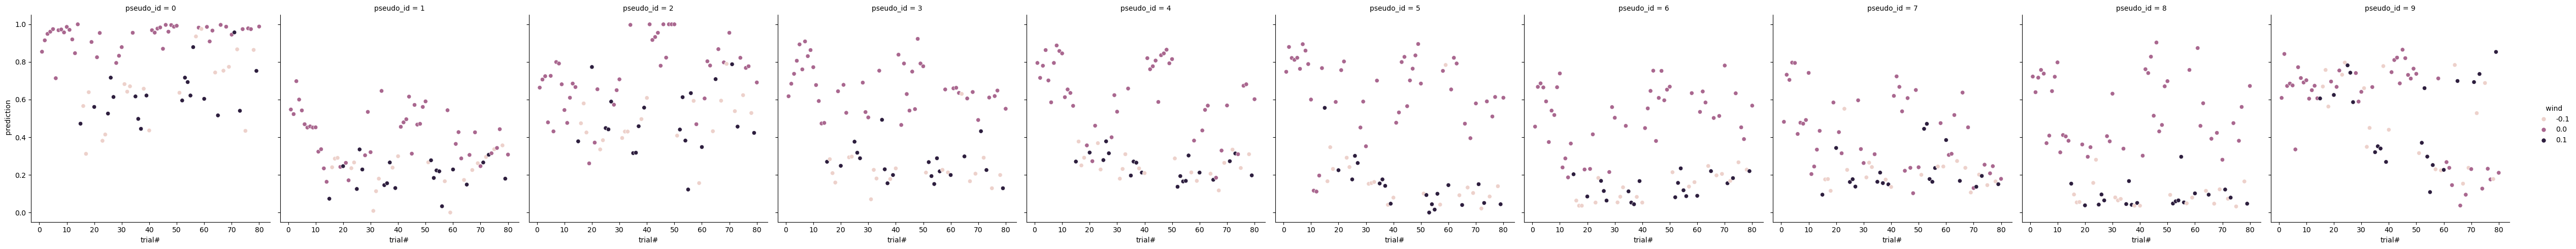

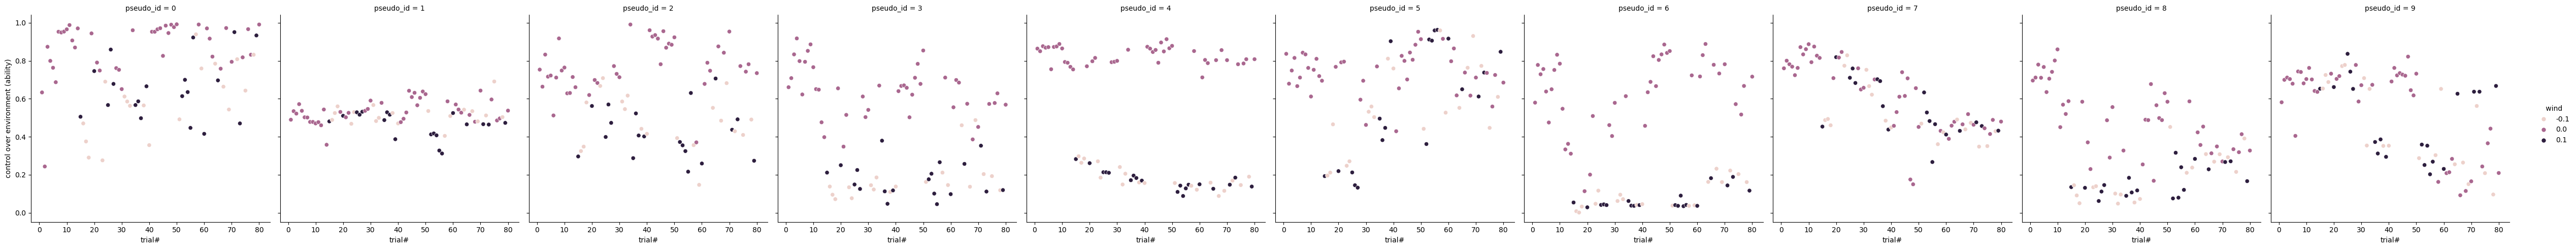

In [8]:
# Create a visualization
fig1 = sns.relplot(data=df, x="trial#", y=" jSuccess", col="pseudo_id", hue=' wind')
fig1.set_ylabels("success")
fig2 = sns.relplot(data=df, x="trial#", y=" prediction", col="pseudo_id", hue=' wind')
fig3 = sns.relplot(data=df, x="trial#", y=" control", col="pseudo_id", hue=' wind')
fig3.set_ylabels("control over environment (ability)")

In [9]:
fig1.savefig(os.path.join("figures", "behaviour_raw_1_success.svg"))
fig2.savefig(os.path.join("figures", "behaviour_raw_2_prediction.svg"))
fig3.savefig(os.path.join("figures", "behaviour_raw_3_control_env.svg"))

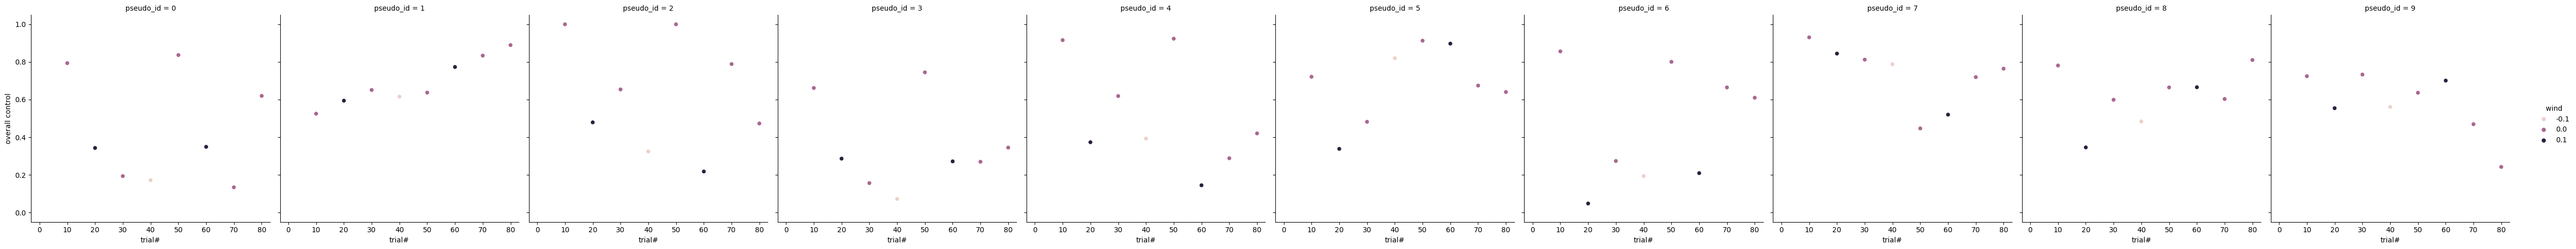

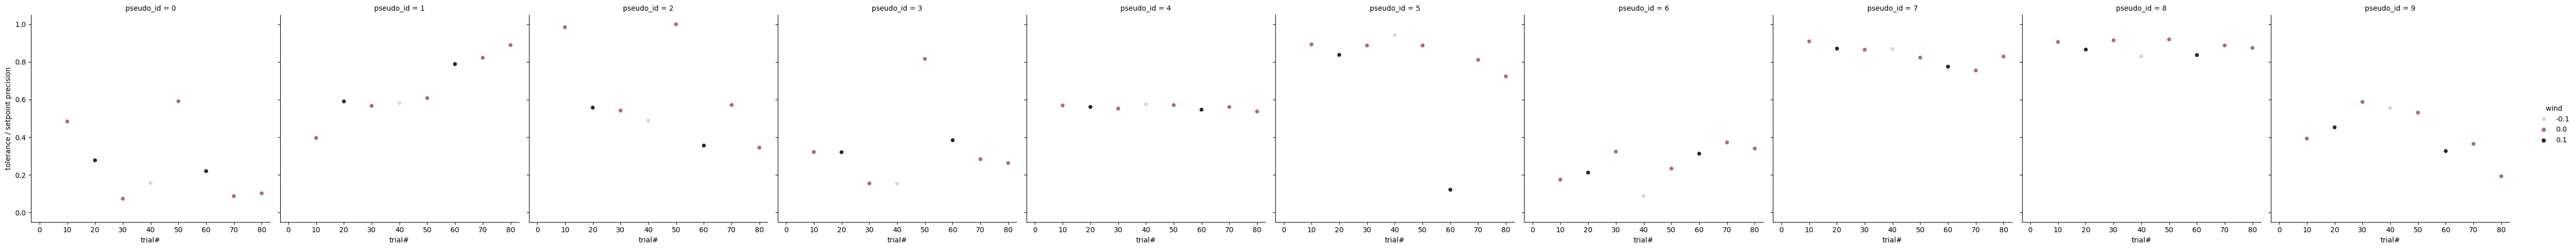

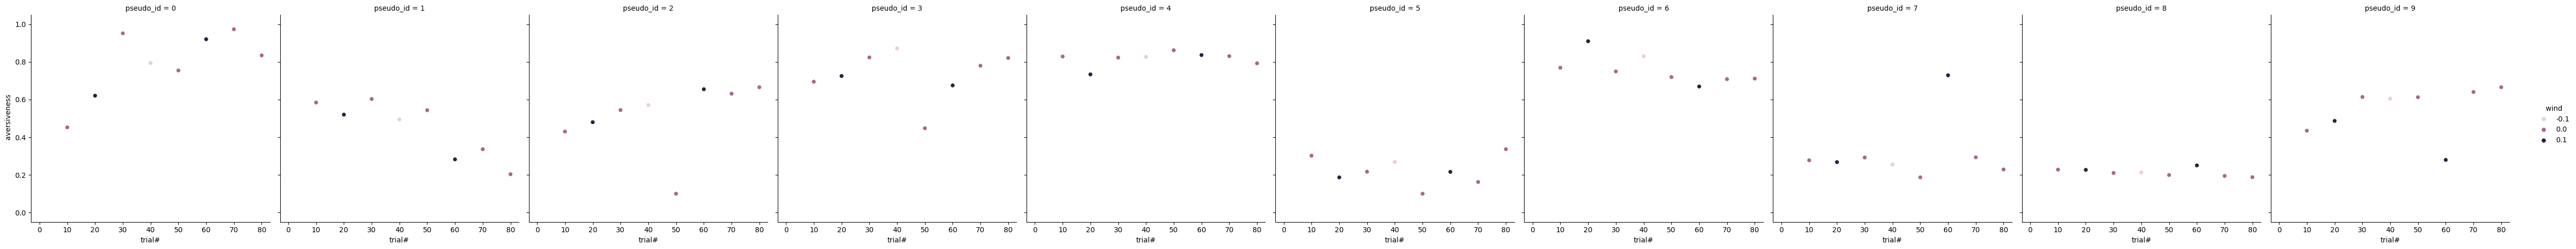

In [8]:
df = df.replace(to_replace={' handling': [-1],
                           ' tolerance': [-1],
                           ' aversiveness': [-1]}, value=np.nan)

fig4 = sns.relplot(data=df, x='trial#', y=' handling', col="pseudo_id", hue=' wind')
fig4.set_ylabels("overall control")
fig4.set(xlim=(-3,83), ylim=(-0.05,1.05))

fig5 = sns.relplot(data=df, x='trial#', y=' tolerance', col="pseudo_id", hue=' wind')
fig5.set(xlim=(-3,83), ylim=(-0.05,1.05))
fig5.set_ylabels("tolerance / setpoint precision")

fig6 = sns.relplot(data=df, x='trial#', y=' aversiveness', col="pseudo_id", hue=' wind')
fig6.set(xlim=(-3,83), ylim=(-0.05,1.05))

In [11]:
fig4.savefig(os.path.join("figures", "behaviour_raw_4_control_overall.svg"))
fig5.savefig(os.path.join("figures", "behaviour_raw_5_tolerance.svg"))
fig6.savefig(os.path.join("figures", "behaviour_raw_6_aversiveness.svg"))

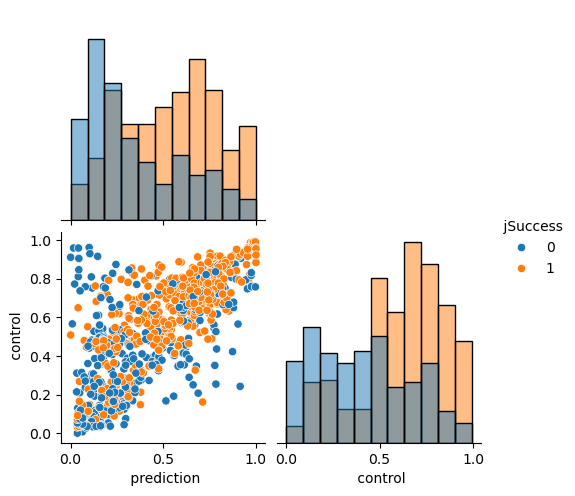

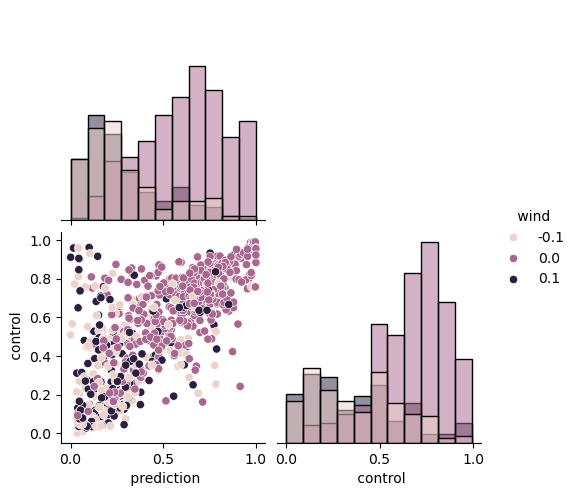

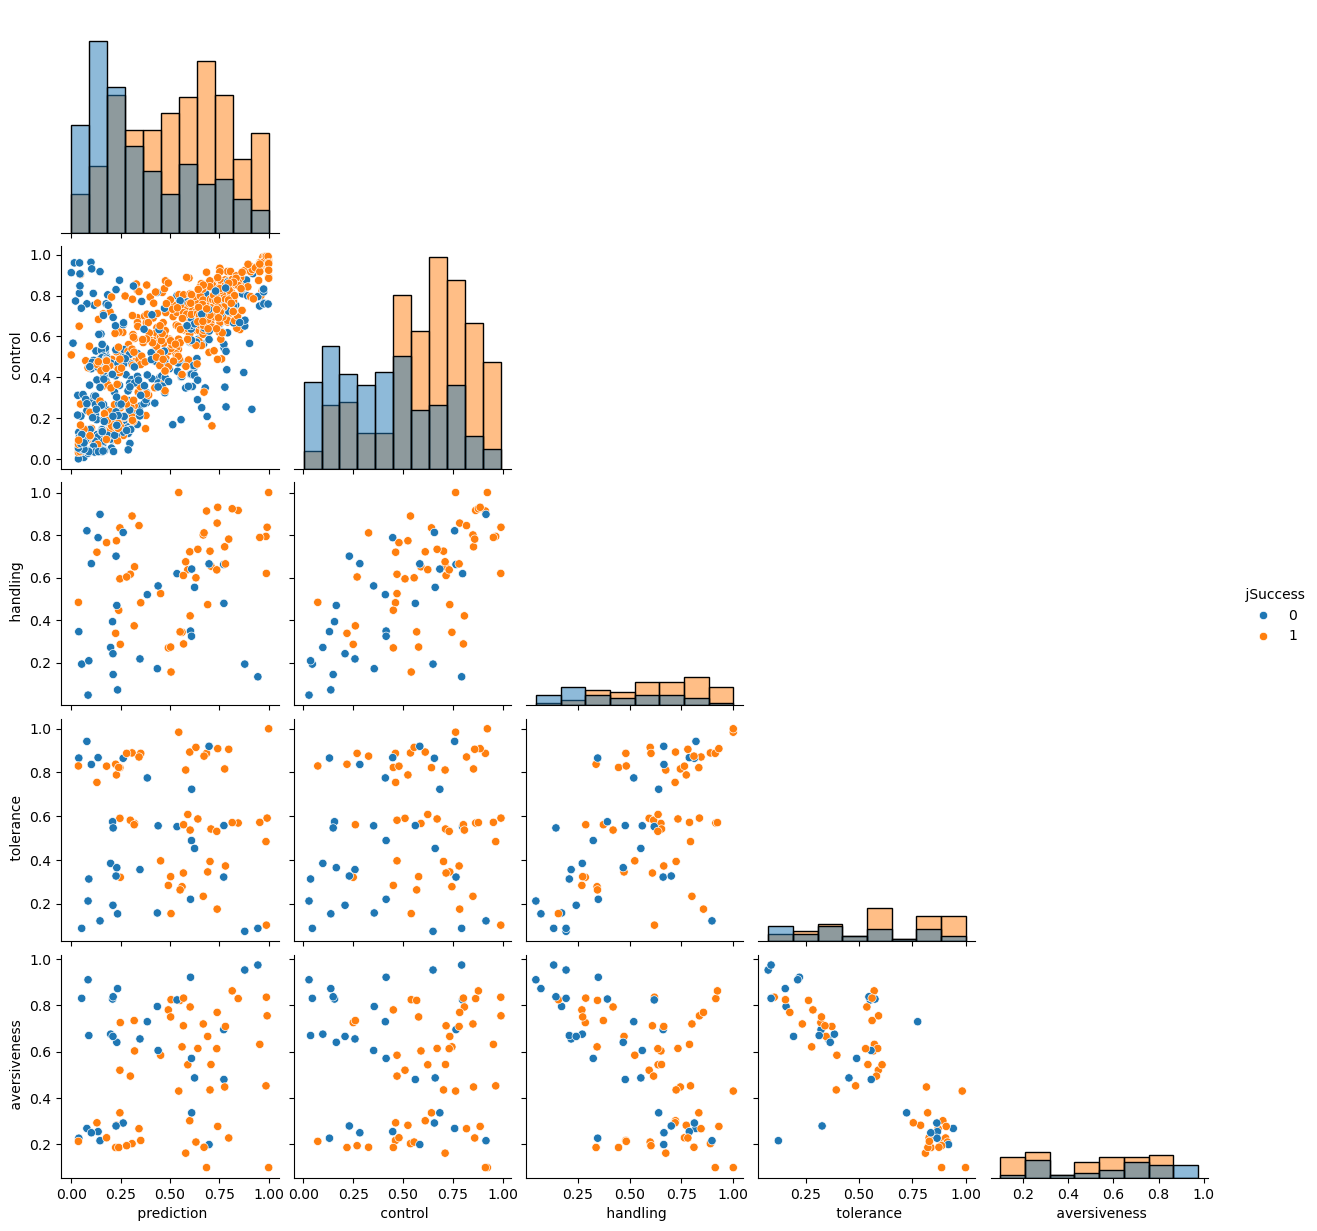

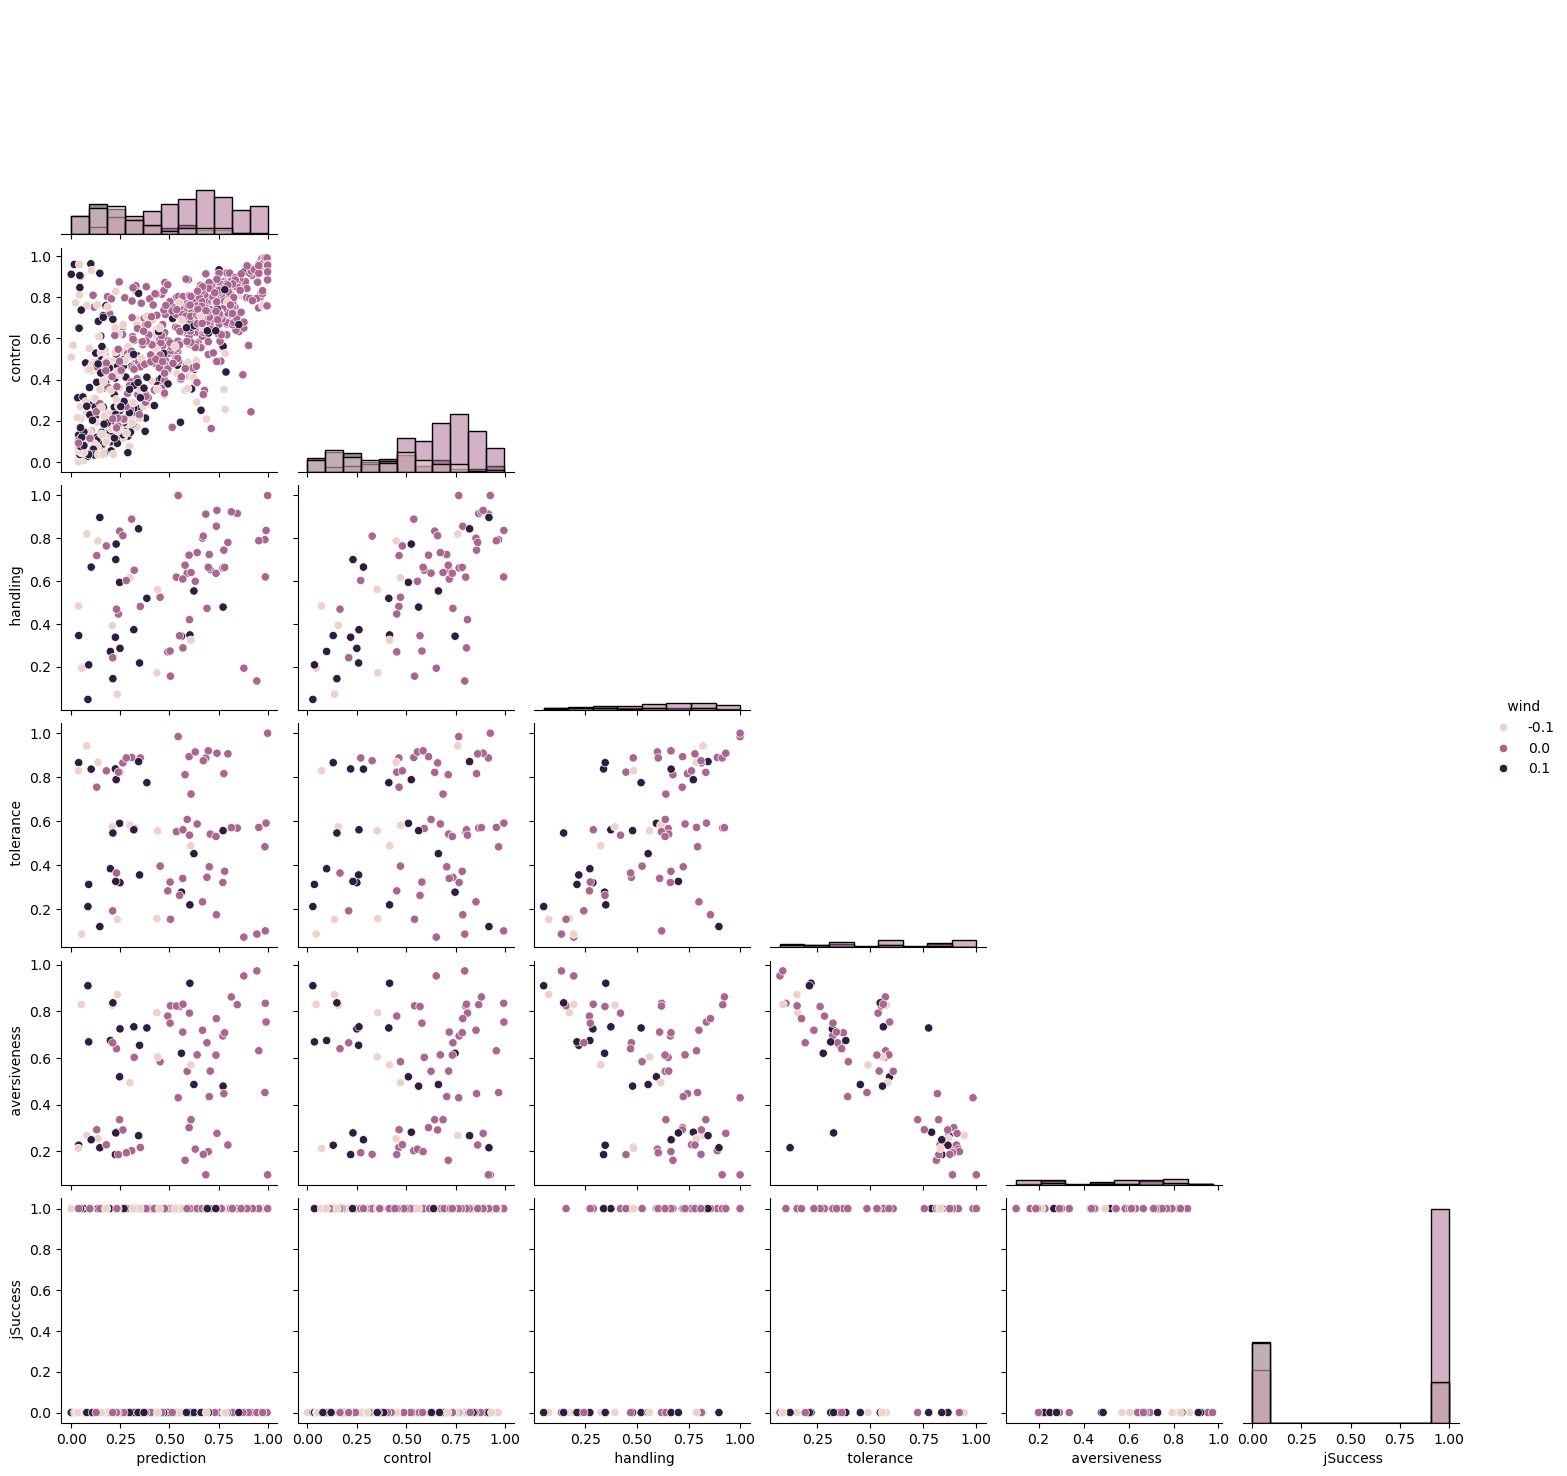

In [12]:
fig10 = sns.pairplot(data=df, 
             vars=[" prediction", " control"], 
            hue=" jSuccess",
            diag_kind="hist",
            corner=True)
fig11 = sns.pairplot(data=df, 
             vars=[" prediction", " control"], 
            hue=" wind",
            diag_kind="hist",
            corner=True)
fig12 = sns.pairplot(data=df, 
             vars=[" prediction", " control", " handling", " tolerance", " aversiveness"], 
            hue=" jSuccess",
            diag_kind="hist",
            corner=True)
fig13 = sns.pairplot(data=df, 
             vars=[" prediction", " control", " handling", " tolerance", " aversiveness", " jSuccess"], 
            hue=" wind",
            diag_kind="hist",
            corner=True)

In [13]:
fig10.savefig(os.path.join("figures", "behaviour_raw_10_ControlEnv_Prediction_by_success.svg"))
fig11.savefig(os.path.join("figures", "behaviour_raw_11_ControlEnv_Prediction_by_wind.svg"))
fig12.savefig(os.path.join("figures", "behaviour_raw_12_pairplot_by_success.svg"))
fig13.savefig(os.path.join("figures", "behaviour_raw_13_pairplot_by_wind.svg"))

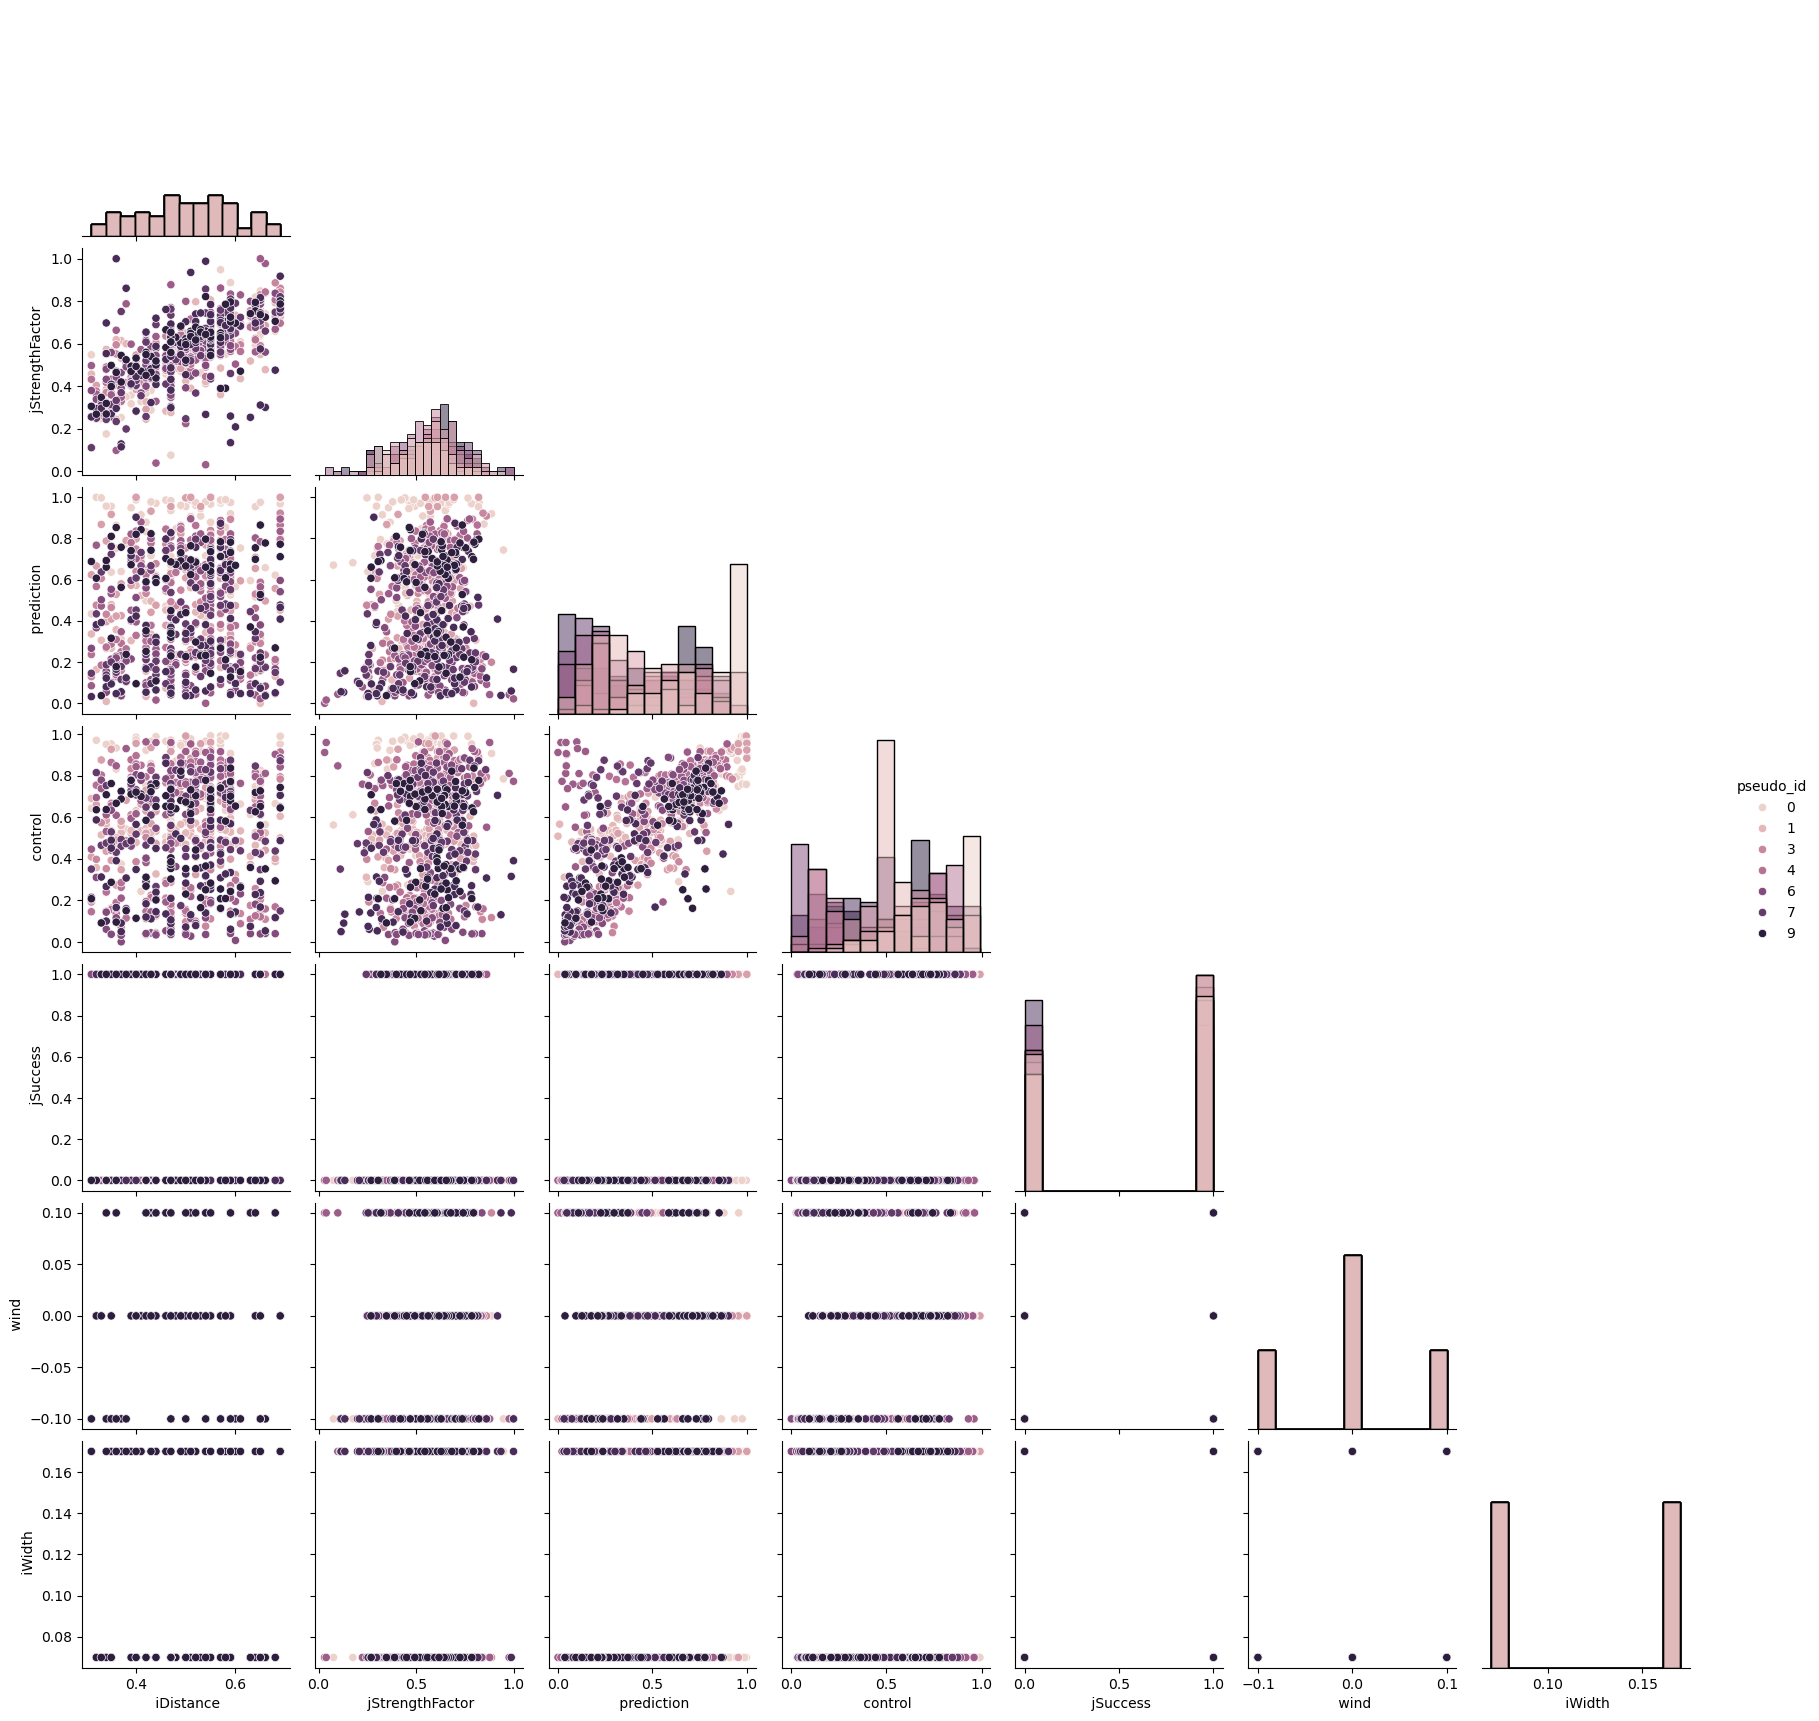

In [14]:
sns.pairplot(data=df, vars=[' iDistance', ' jStrengthFactor', ' prediction', ' control', ' jSuccess', ' wind', ' iWidth'], 
             hue='pseudo_id', diag_kind="hist",
            corner=True)

### Dependence of subsequent responses

internal pilots:
- button box ids 0-2
- slider ids 3-5


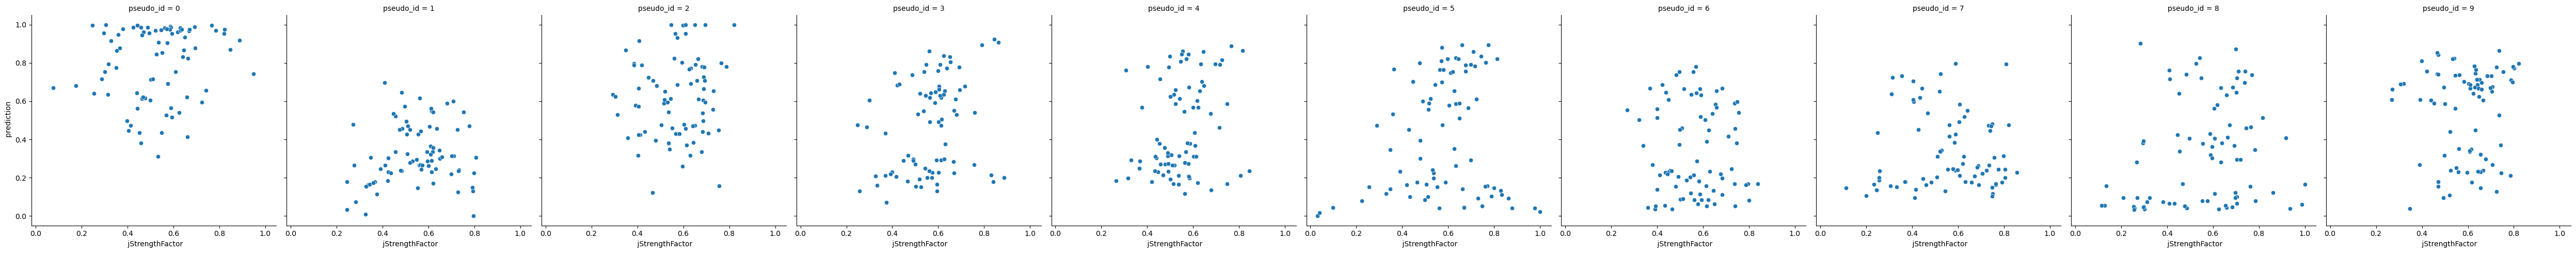

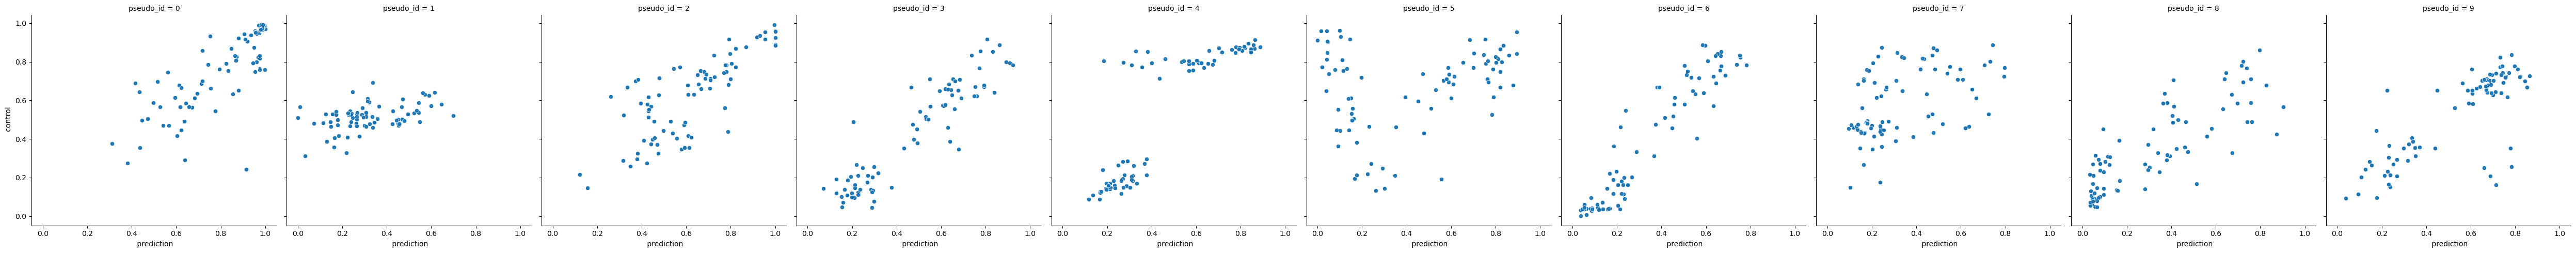

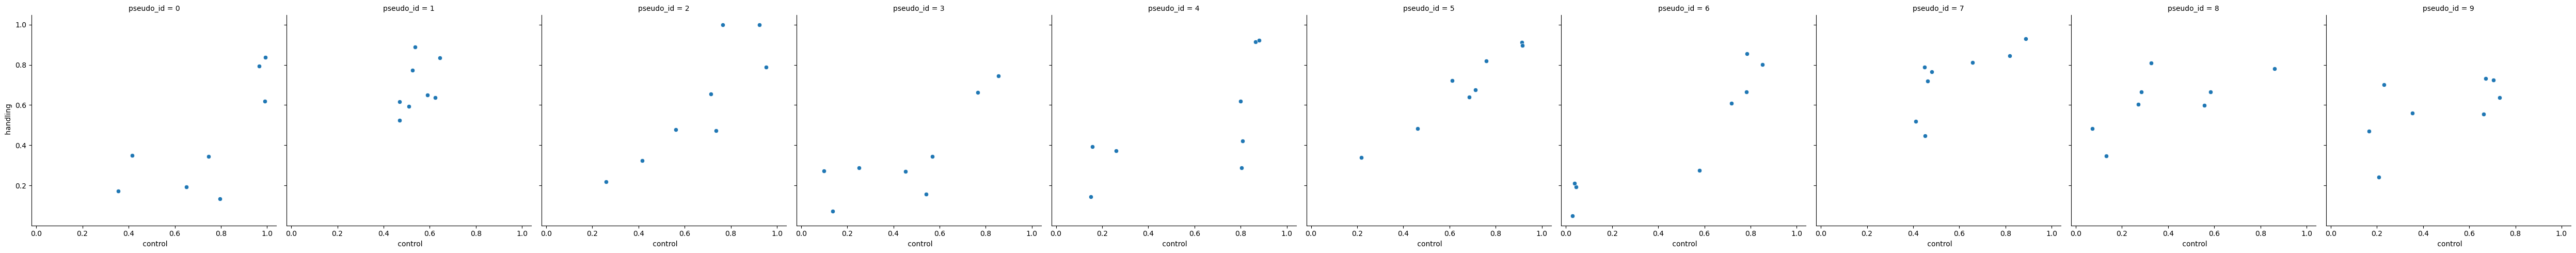

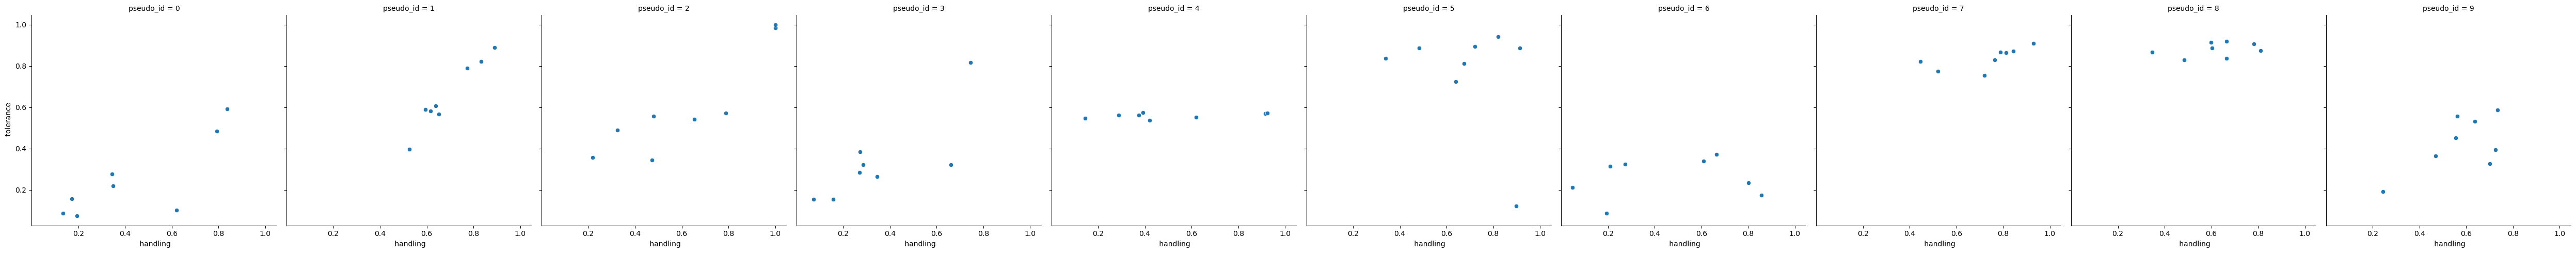

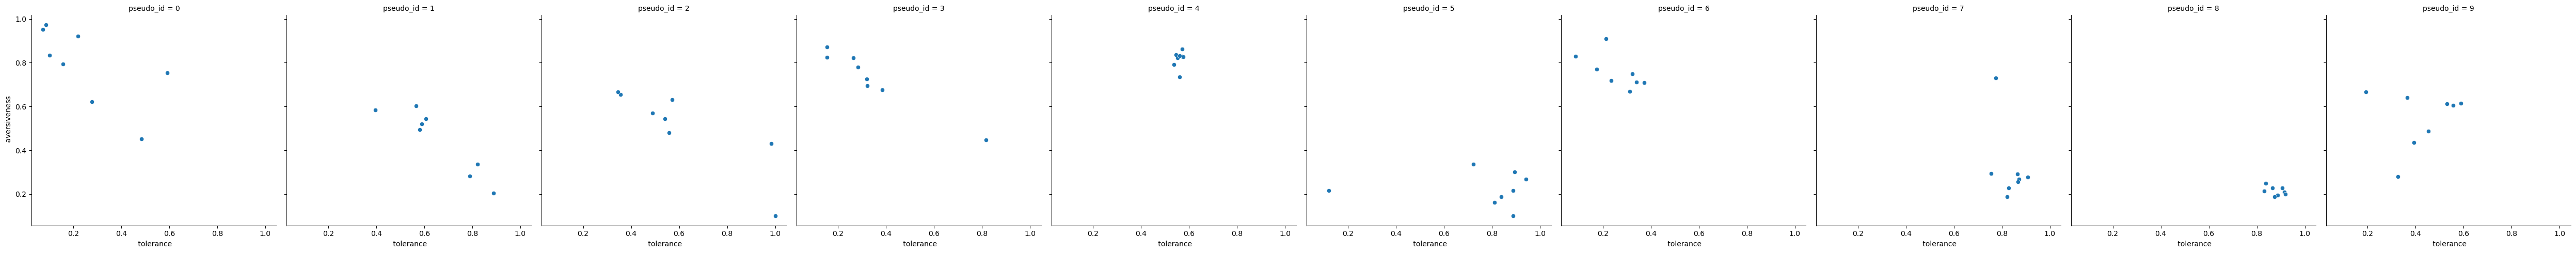

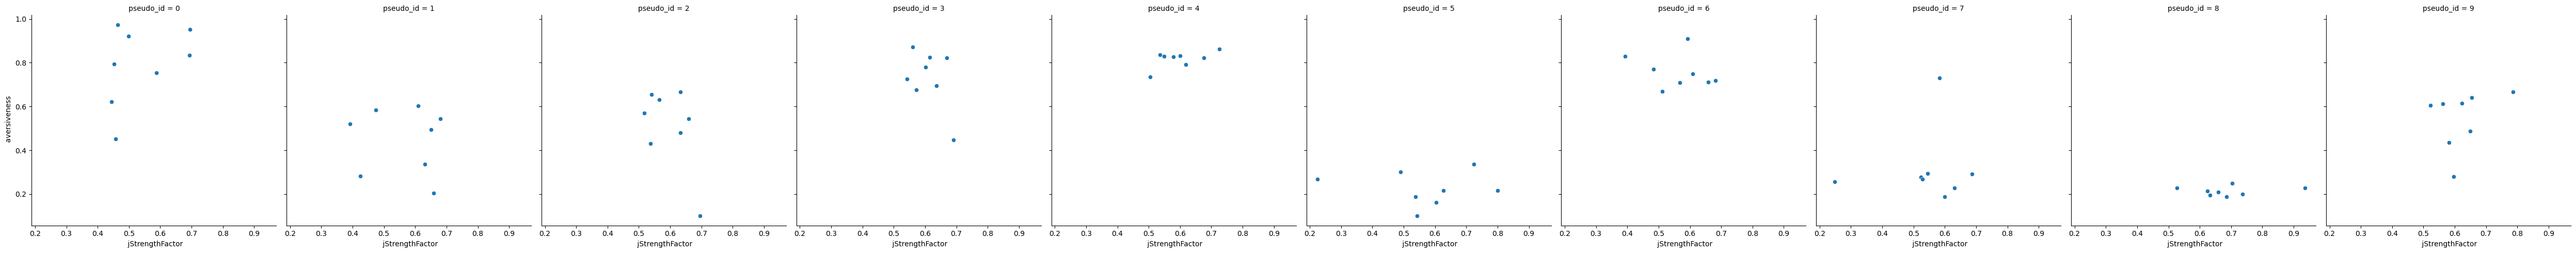

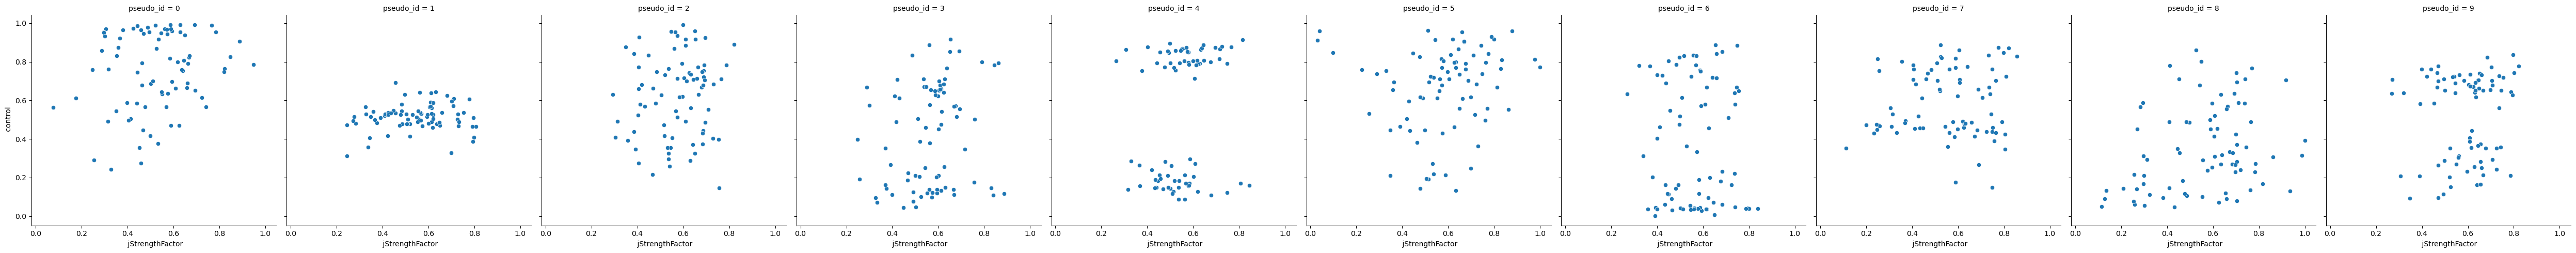

In [15]:
# Create a visualization of subsequent responses
sns.relplot(data=df, x=" jStrengthFactor", y=" prediction", col="pseudo_id")
sns.relplot(data=df, x=" prediction", y=" control", col="pseudo_id")
sns.relplot(data=df, x=" control", y=" handling", col="pseudo_id")
sns.relplot(data=df, x=" handling", y=" tolerance", col="pseudo_id")
sns.relplot(data=df, x=" tolerance", y=" aversiveness", col="pseudo_id")
sns.relplot(data=df, x=" jStrengthFactor", y=" aversiveness", col="pseudo_id")
sns.relplot(data=df, x=" jStrengthFactor", y=" control", col="pseudo_id")

### Average responses (across sub) over trials

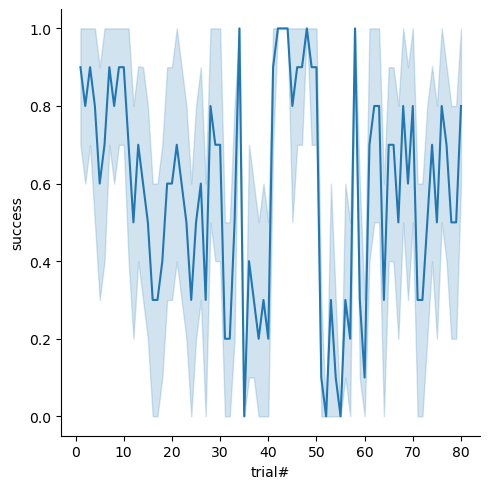

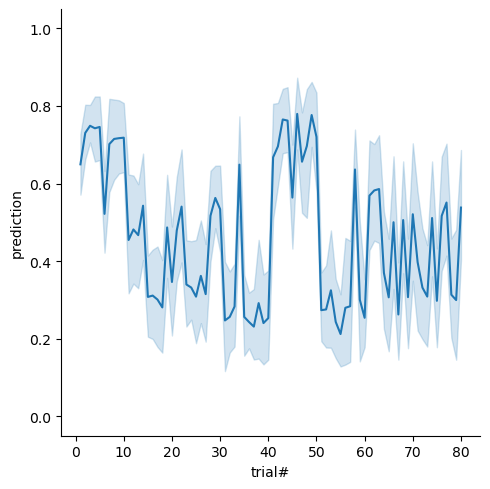

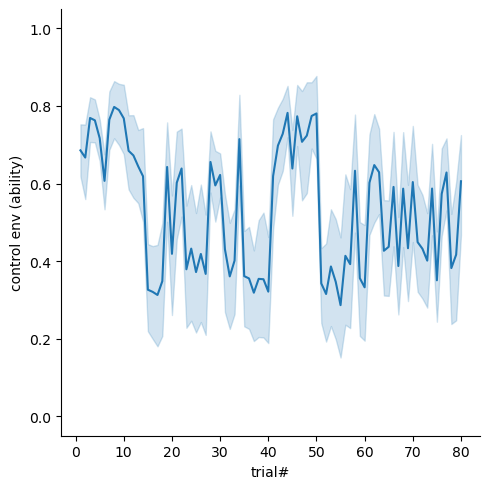

In [16]:
# Avg success (across sub) over trials
fig20 = sns.relplot(data=df, kind="line", x="trial#", y=" jSuccess")
fig20.set_ylabels("success")
fig20.savefig(os.path.join("figures", "behaviour_raw_20_avg_success.svg"))

# Avg prediction (across sub) over trials
fig21 = sns.relplot(data=df, kind="line", x="trial#", y=" prediction")
fig21.set(ylim=(-0.05,1.05))
fig21.set_ylabels("prediction")
fig21.savefig(os.path.join("figures", "behaviour_raw_21_avg_prediction.svg"))

# Avg control rating (across sub) over trials
fig22 = sns.relplot(data=df, kind="line", x="trial#", y=" control")
fig22.set(ylim=(-0.05,1.05))
fig22.set_ylabels("control env (ability)")
fig22.savefig(os.path.join("figures", "behaviour_raw_22_avg_control_env.svg"))

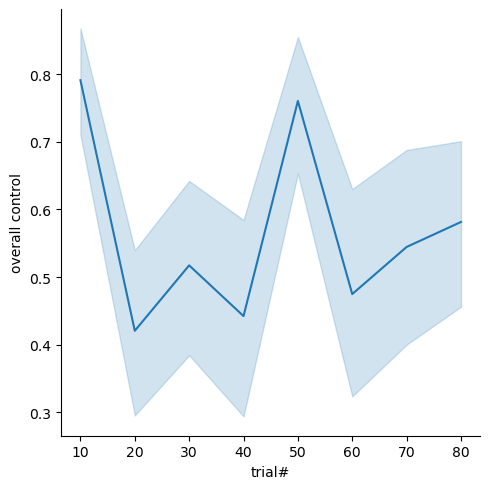

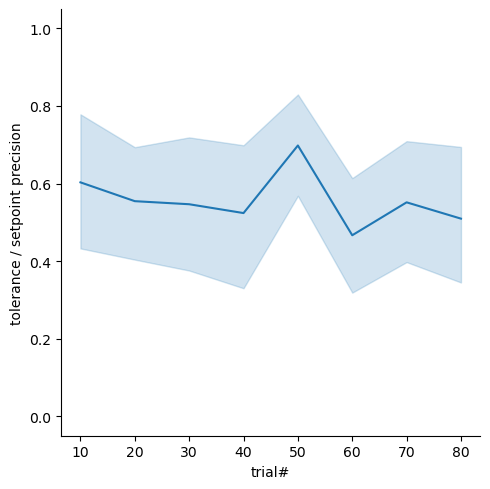

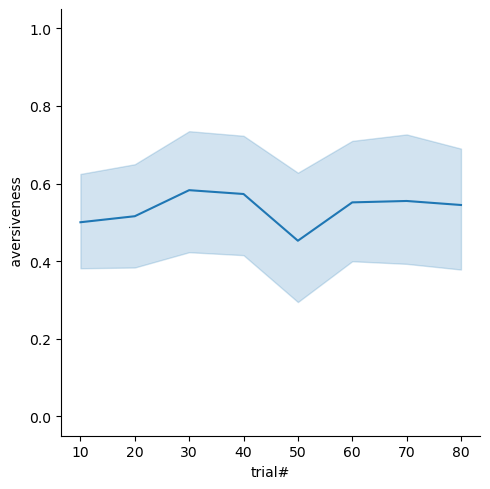

In [17]:
# Avg overall_control (across sub) over trials
fig24 = sns.relplot(data=df, kind="line", x="trial#", y=" handling")
fig24.set_ylabels("overall control")
fig24.savefig(os.path.join("figures", "behaviour_raw_24_avg_control_overall.svg"))


# Avg tolerance (across sub) over trials
fig25 = sns.relplot(data=df, kind="line", x="trial#", y=" tolerance")
fig25.set(ylim=(-0.05,1.05))
fig25.set_ylabels("tolerance / setpoint precision")
fig25.savefig(os.path.join("figures", "behaviour_raw_25_avg_tolerance.svg"))

# Avg aversiveness rating (across sub) over trials
fig26 = sns.relplot(data=df, kind="line", x="trial#", y=" aversiveness")
fig26.set(ylim=(-0.05,1.05))
fig26.savefig(os.path.join("figures", "behaviour_raw_26_avg_aversiveness.svg"))

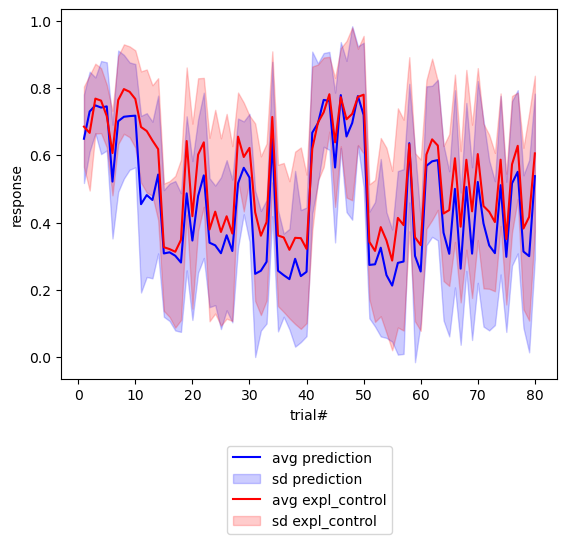

In [18]:
# Avg pred, expl_control (across sub) over trials
fig27 = sns.lineplot(data=df, x="trial#", y=" prediction", errorbar='sd', color='blue')
fig27 = sns.lineplot(data=df, x="trial#", y=" control", errorbar='sd', color='red')
fig27.set_ylabel("response")
lgd27 = plt.legend(["avg prediction", "sd prediction", "avg expl_control", "sd expl_control"], 
           loc='center', bbox_to_anchor=(0.5, -0.3))
plt.savefig(os.path.join("figures", "behaviour_raw_27_avg_pred_expl-contr.svg"),
           bbox_extra_artists=(lgd27,), bbox_inches='tight')

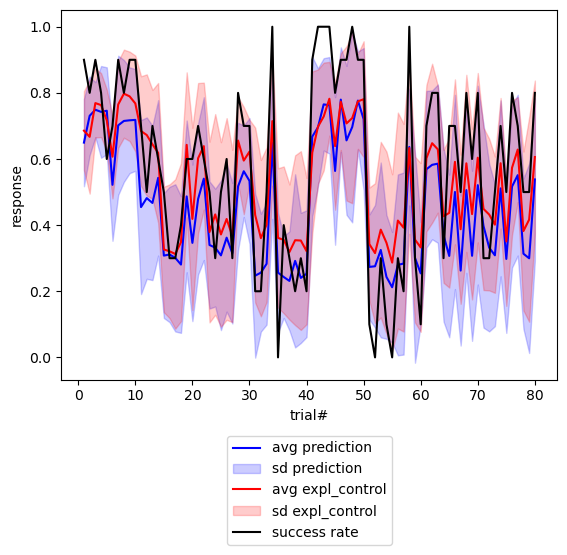

In [19]:
# Avg pred, expl_control (across sub) over trials
fig28 = sns.lineplot(data=df, x="trial#", y=" prediction", errorbar='sd', color='blue')
fig28 = sns.lineplot(data=df, x="trial#", y=" control", errorbar='sd', color='red')
fig28 = sns.lineplot(data=df, x="trial#", y=" jSuccess", errorbar=None, color='black')
fig28.set_ylabel("response")
lgd28 = plt.legend(["avg prediction", "sd prediction", "avg expl_control", "sd expl_control", "success rate"], 
           loc='center', bbox_to_anchor=(0.5, -0.3))
plt.savefig(os.path.join("figures", "behaviour_raw_28_avg_pred_expl-contr_success.svg"),
           bbox_extra_artists=(lgd28,), bbox_inches='tight')

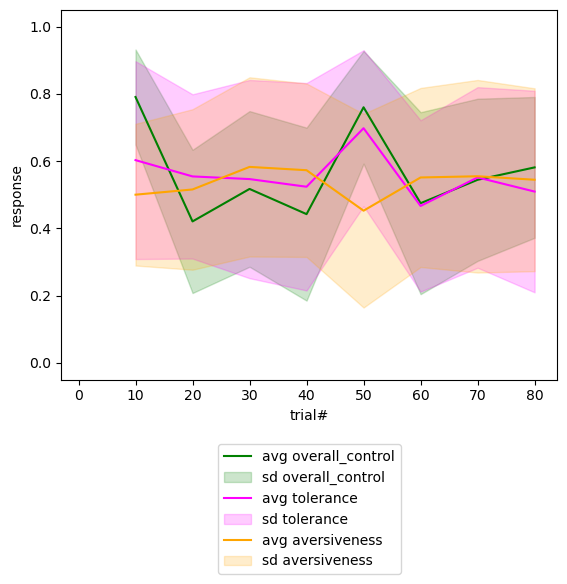

In [20]:
# Avg overall_control, tolerance, aversiveness (across sub) over trials
fig29 = sns.lineplot(data=df, x="trial#", y=" handling", errorbar='sd', color='green')
fig29 = sns.lineplot(data=df, x="trial#", y=" tolerance", errorbar='sd', color='magenta')
fig29 = sns.lineplot(data=df, x="trial#", y=" aversiveness", errorbar='sd', color='orange')
fig29.set(xlim=(-3,84), ylim=(-0.05,1.05))
fig29.set_ylabel("response")
lgd29 = plt.legend(["avg overall_control", "sd overall_control", "avg tolerance", "sd tolerance", "avg aversiveness", "sd aversiveness"], 
           loc='center', bbox_to_anchor=(0.5, -0.35))
plt.savefig(os.path.join("figures", "behaviour_raw_29_avg_contr_tol_av.svg"),
           bbox_extra_artists=(lgd29,), bbox_inches='tight')

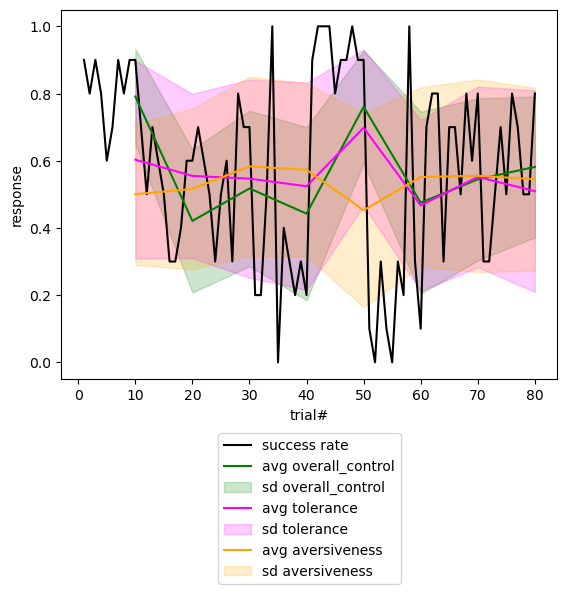

In [21]:
# Avg overall_control, tolerance, aversiveness over trials
fig30 = sns.lineplot(data=df, x="trial#", y=" jSuccess", errorbar=None, color='black')
fig30 = sns.lineplot(data=df, x="trial#", y=" handling", errorbar='sd', color='green')
fig30 = sns.lineplot(data=df, x="trial#", y=" tolerance", errorbar='sd', color='magenta')
fig30 = sns.lineplot(data=df, x="trial#", y=" aversiveness", errorbar='sd', color='orange')
fig30.set_ylabel("response")
lgd30 = plt.legend(["success rate", "avg overall_control", "sd overall_control", "avg tolerance", "sd tolerance", "avg aversiveness", "sd aversiveness"],
           loc='center', bbox_to_anchor=(0.5, -0.35))
plt.savefig(os.path.join("figures", "behaviour_raw_30_avg_contr_tol_av_succ.svg"),
           bbox_extra_artists=(lgd30,), bbox_inches='tight')

-0.78347432152005

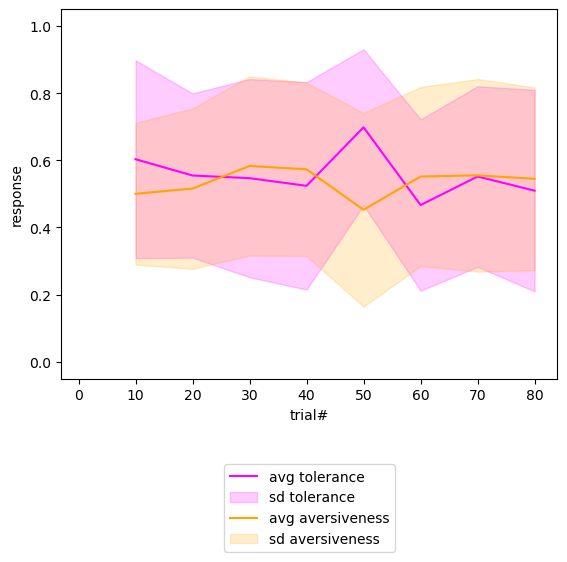

In [22]:
# Avg overall_control, tolerance, aversiveness (across sub) over trials
fig90 = sns.lineplot(data=df, x="trial#", y=" tolerance", errorbar='sd', color='magenta')
fig90 = sns.lineplot(data=df, x="trial#", y=" aversiveness", errorbar='sd', color='orange')
fig90.set(xlim=(-3,84), ylim=(-0.05,1.05))
fig90.set_ylabel("response")
lgd90 = plt.legend(["avg tolerance", "sd tolerance", "avg aversiveness", "sd aversiveness"], 
           loc='center', bbox_to_anchor=(0.5, -0.35))
plt.savefig(os.path.join("figures", "behaviour_raw_90_avg_tol_av.svg"),
           bbox_extra_artists=(lgd90,), bbox_inches='tight')

# correlation between tolerance & aversiveness
df[" tolerance"].corr(df[" aversiveness"])

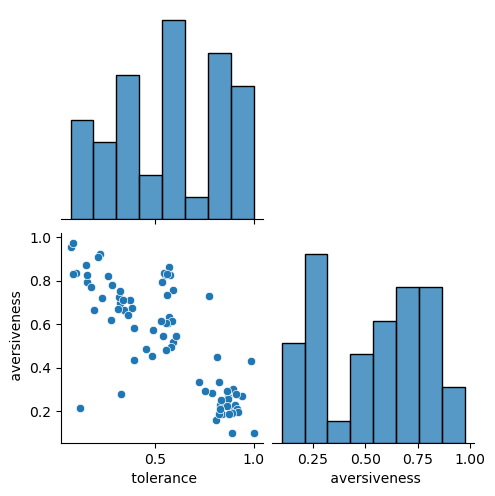

In [10]:
fig91 = sns.pairplot(data=df, 
             vars=[" tolerance", " aversiveness"], 
            diag_kind="hist",
            corner=True)

plt.savefig(os.path.join("figures", "behaviour_raw_91_pairplot_tol_av.svg"))

### Distribution of task performance and responses

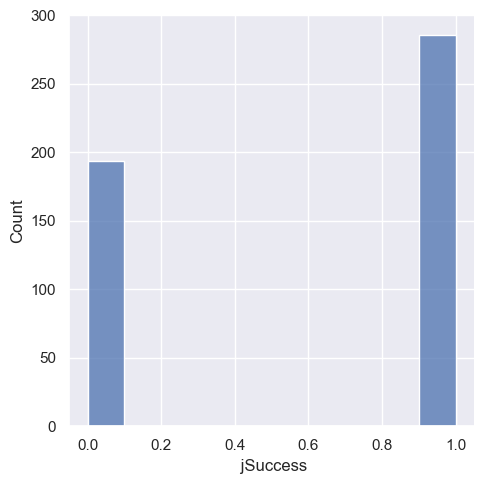

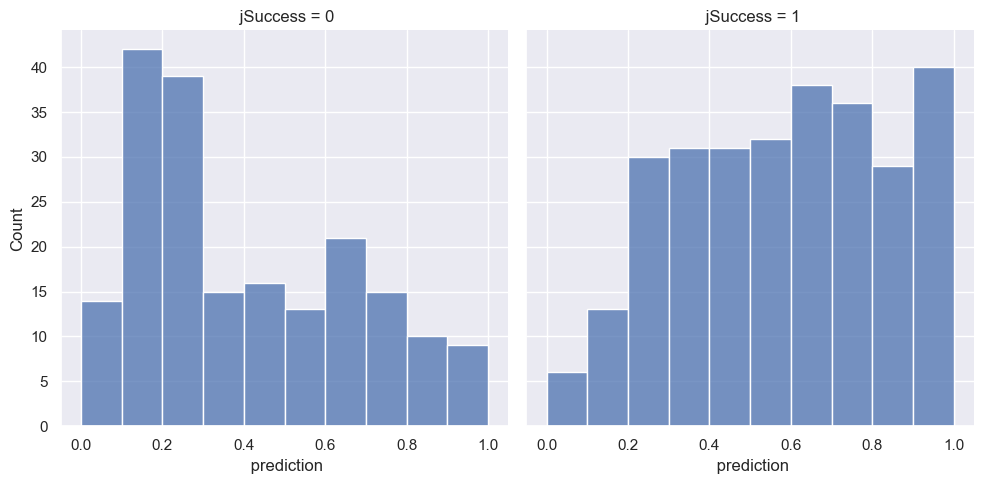

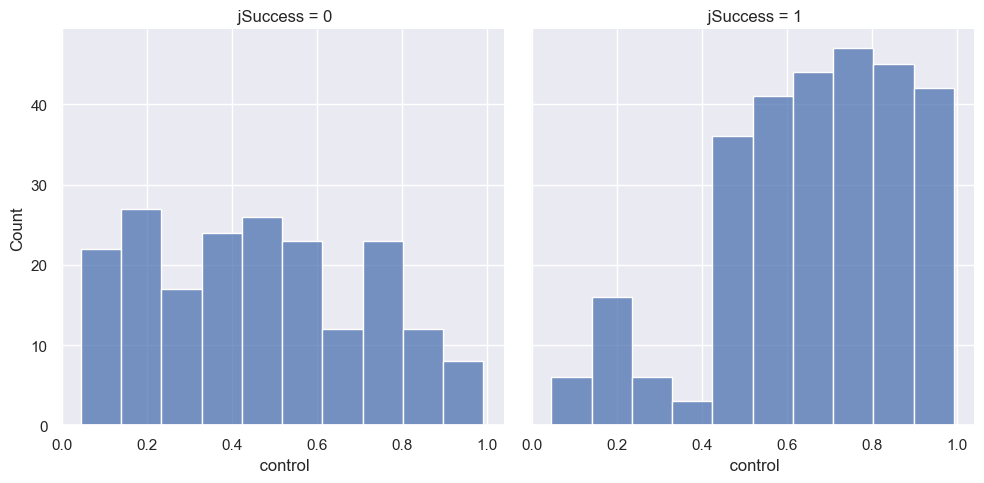

In [52]:
# distr of success/failures
sns.displot(data=df, x=" jSuccess")

# distr of predictions 
sns.displot(data=df, x=" prediction", col=" jSuccess")

# distr of control ratings
sns.displot(data=df, x=" control", col=" jSuccess")

&nbsp;
___
# Questionnaire data


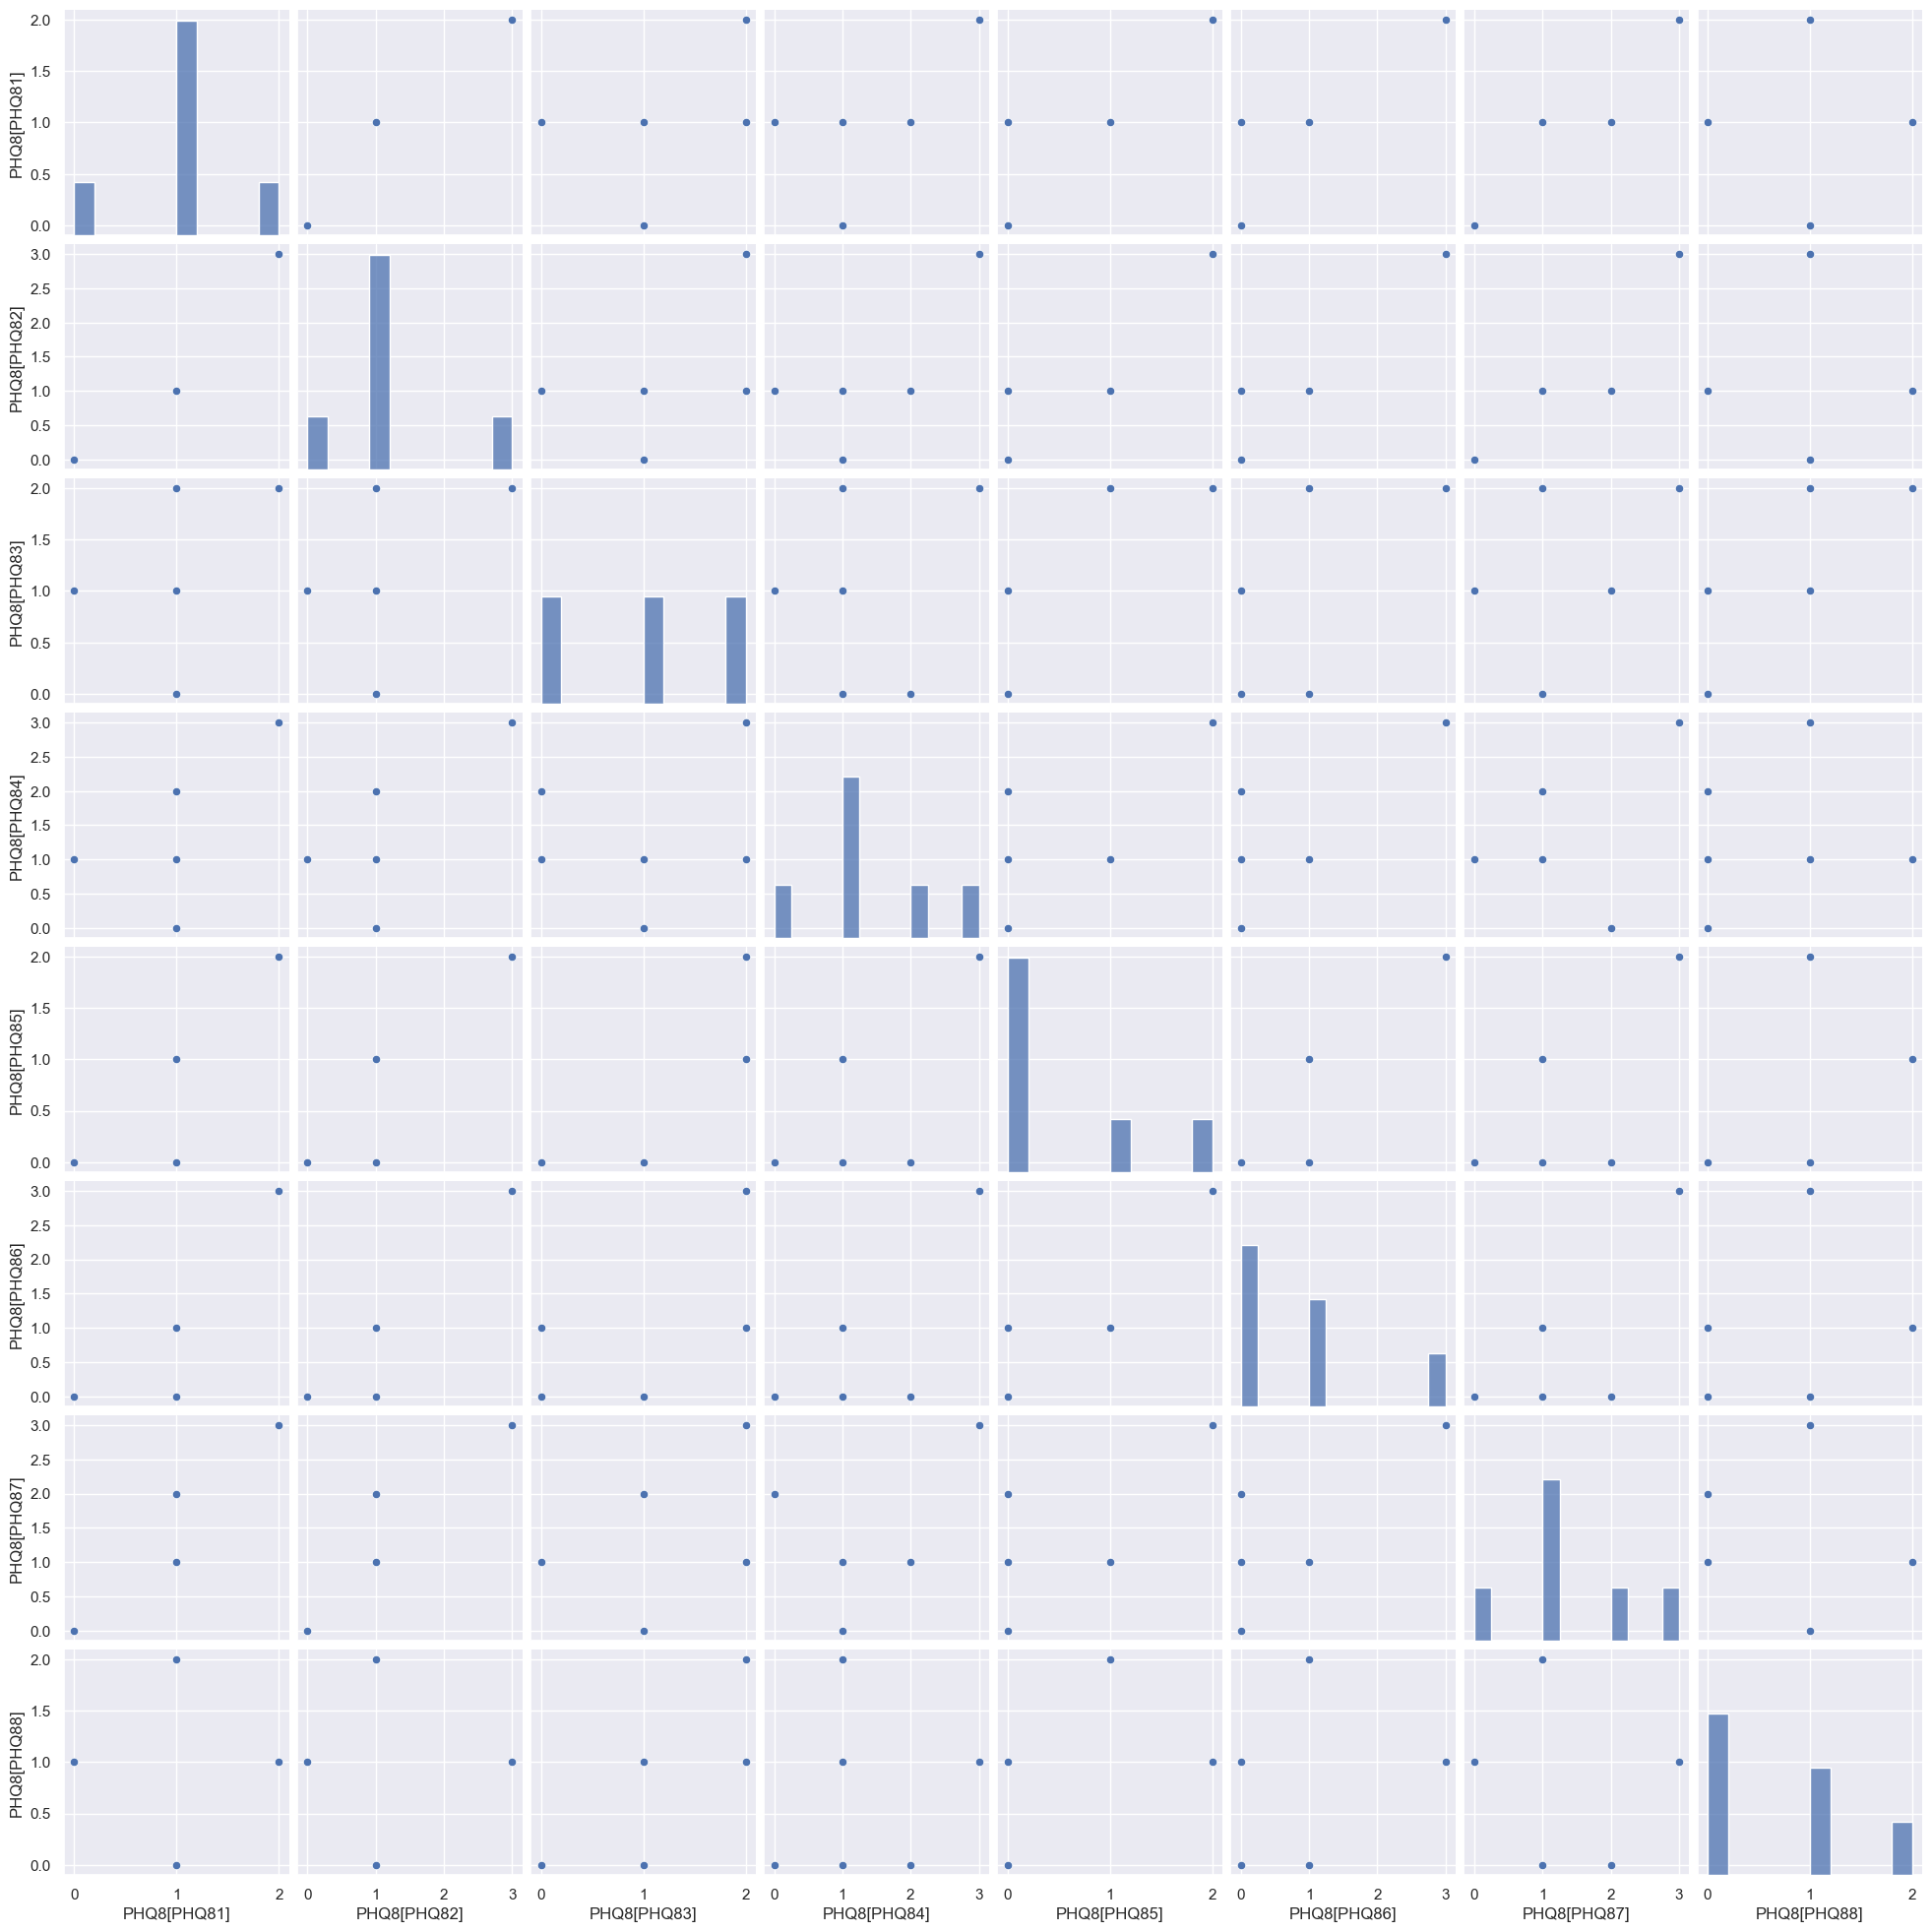

In [53]:
# check out sns.jointplot & sns.pairplot (https://seaborn.pydata.org/tutorial/introduction.html)

sns.pairplot(data=df[['PHQ8[PHQ81]', 'PHQ8[PHQ82]', 'PHQ8[PHQ83]', 'PHQ8[PHQ84]', 'PHQ8[PHQ85]', 'PHQ8[PHQ86]', 'PHQ8[PHQ87]', 'PHQ8[PHQ88]']])

In [54]:
print(df['PCI[PCI01]'][0])
print(df['LOC[LOC01]'][0])
print(df['GSES[GSE01]'][0])
print(df['MAIA2[MAIA01]'][0])
print(df['PSQI4'][0])
print(df['StaitAllQuestions[STAIT01]'][0])
print(df['PHQ8[PHQ81]'][0])
print(df['dsqperson01'][0])

2
4
3
4
1970-01-01 07:00:00
3
1
1992


In [55]:
print(df['PCI[PCI02]'][0]) #sub1
print(df['PCI[PCI02]'][80]) #sub2 ...
print(df['PCI[PCI02]'][160]) #sub3 ...

3
3
4


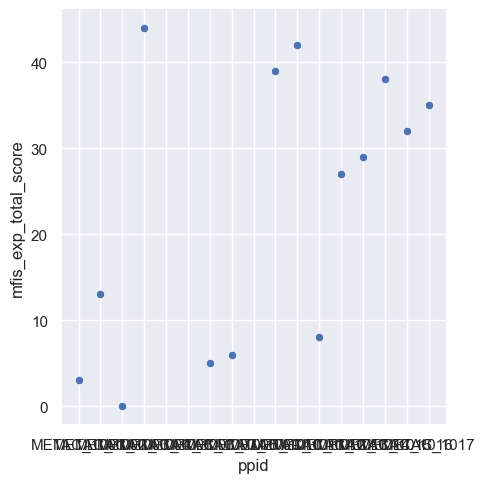

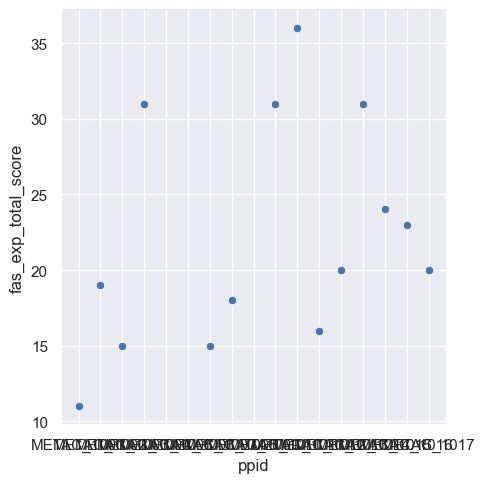

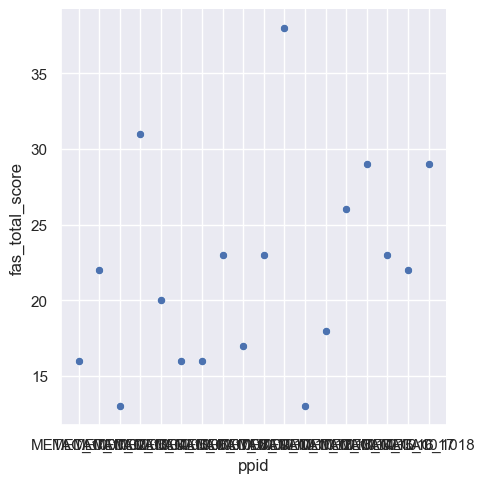

In [56]:
### REDCap data
sns.relplot(data=r_temp, x="ppid", y="mfis_exp_total_score")
sns.relplot(data=r_temp, x="ppid", y="fas_exp_total_score")
sns.relplot(data=r_temp, x="ppid", y="fas_total_score")

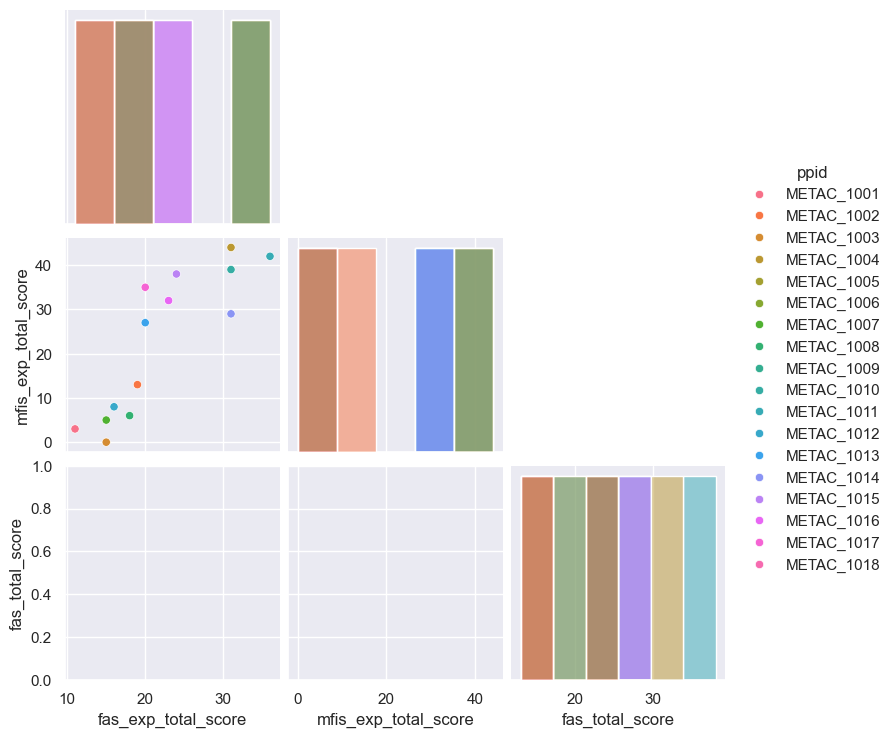

In [57]:
sns.pairplot(data=r_temp, vars=['fas_exp_total_score', 'mfis_exp_total_score', 'fas_total_score'], 
             hue='ppid', diag_kind="hist",
            corner=True)

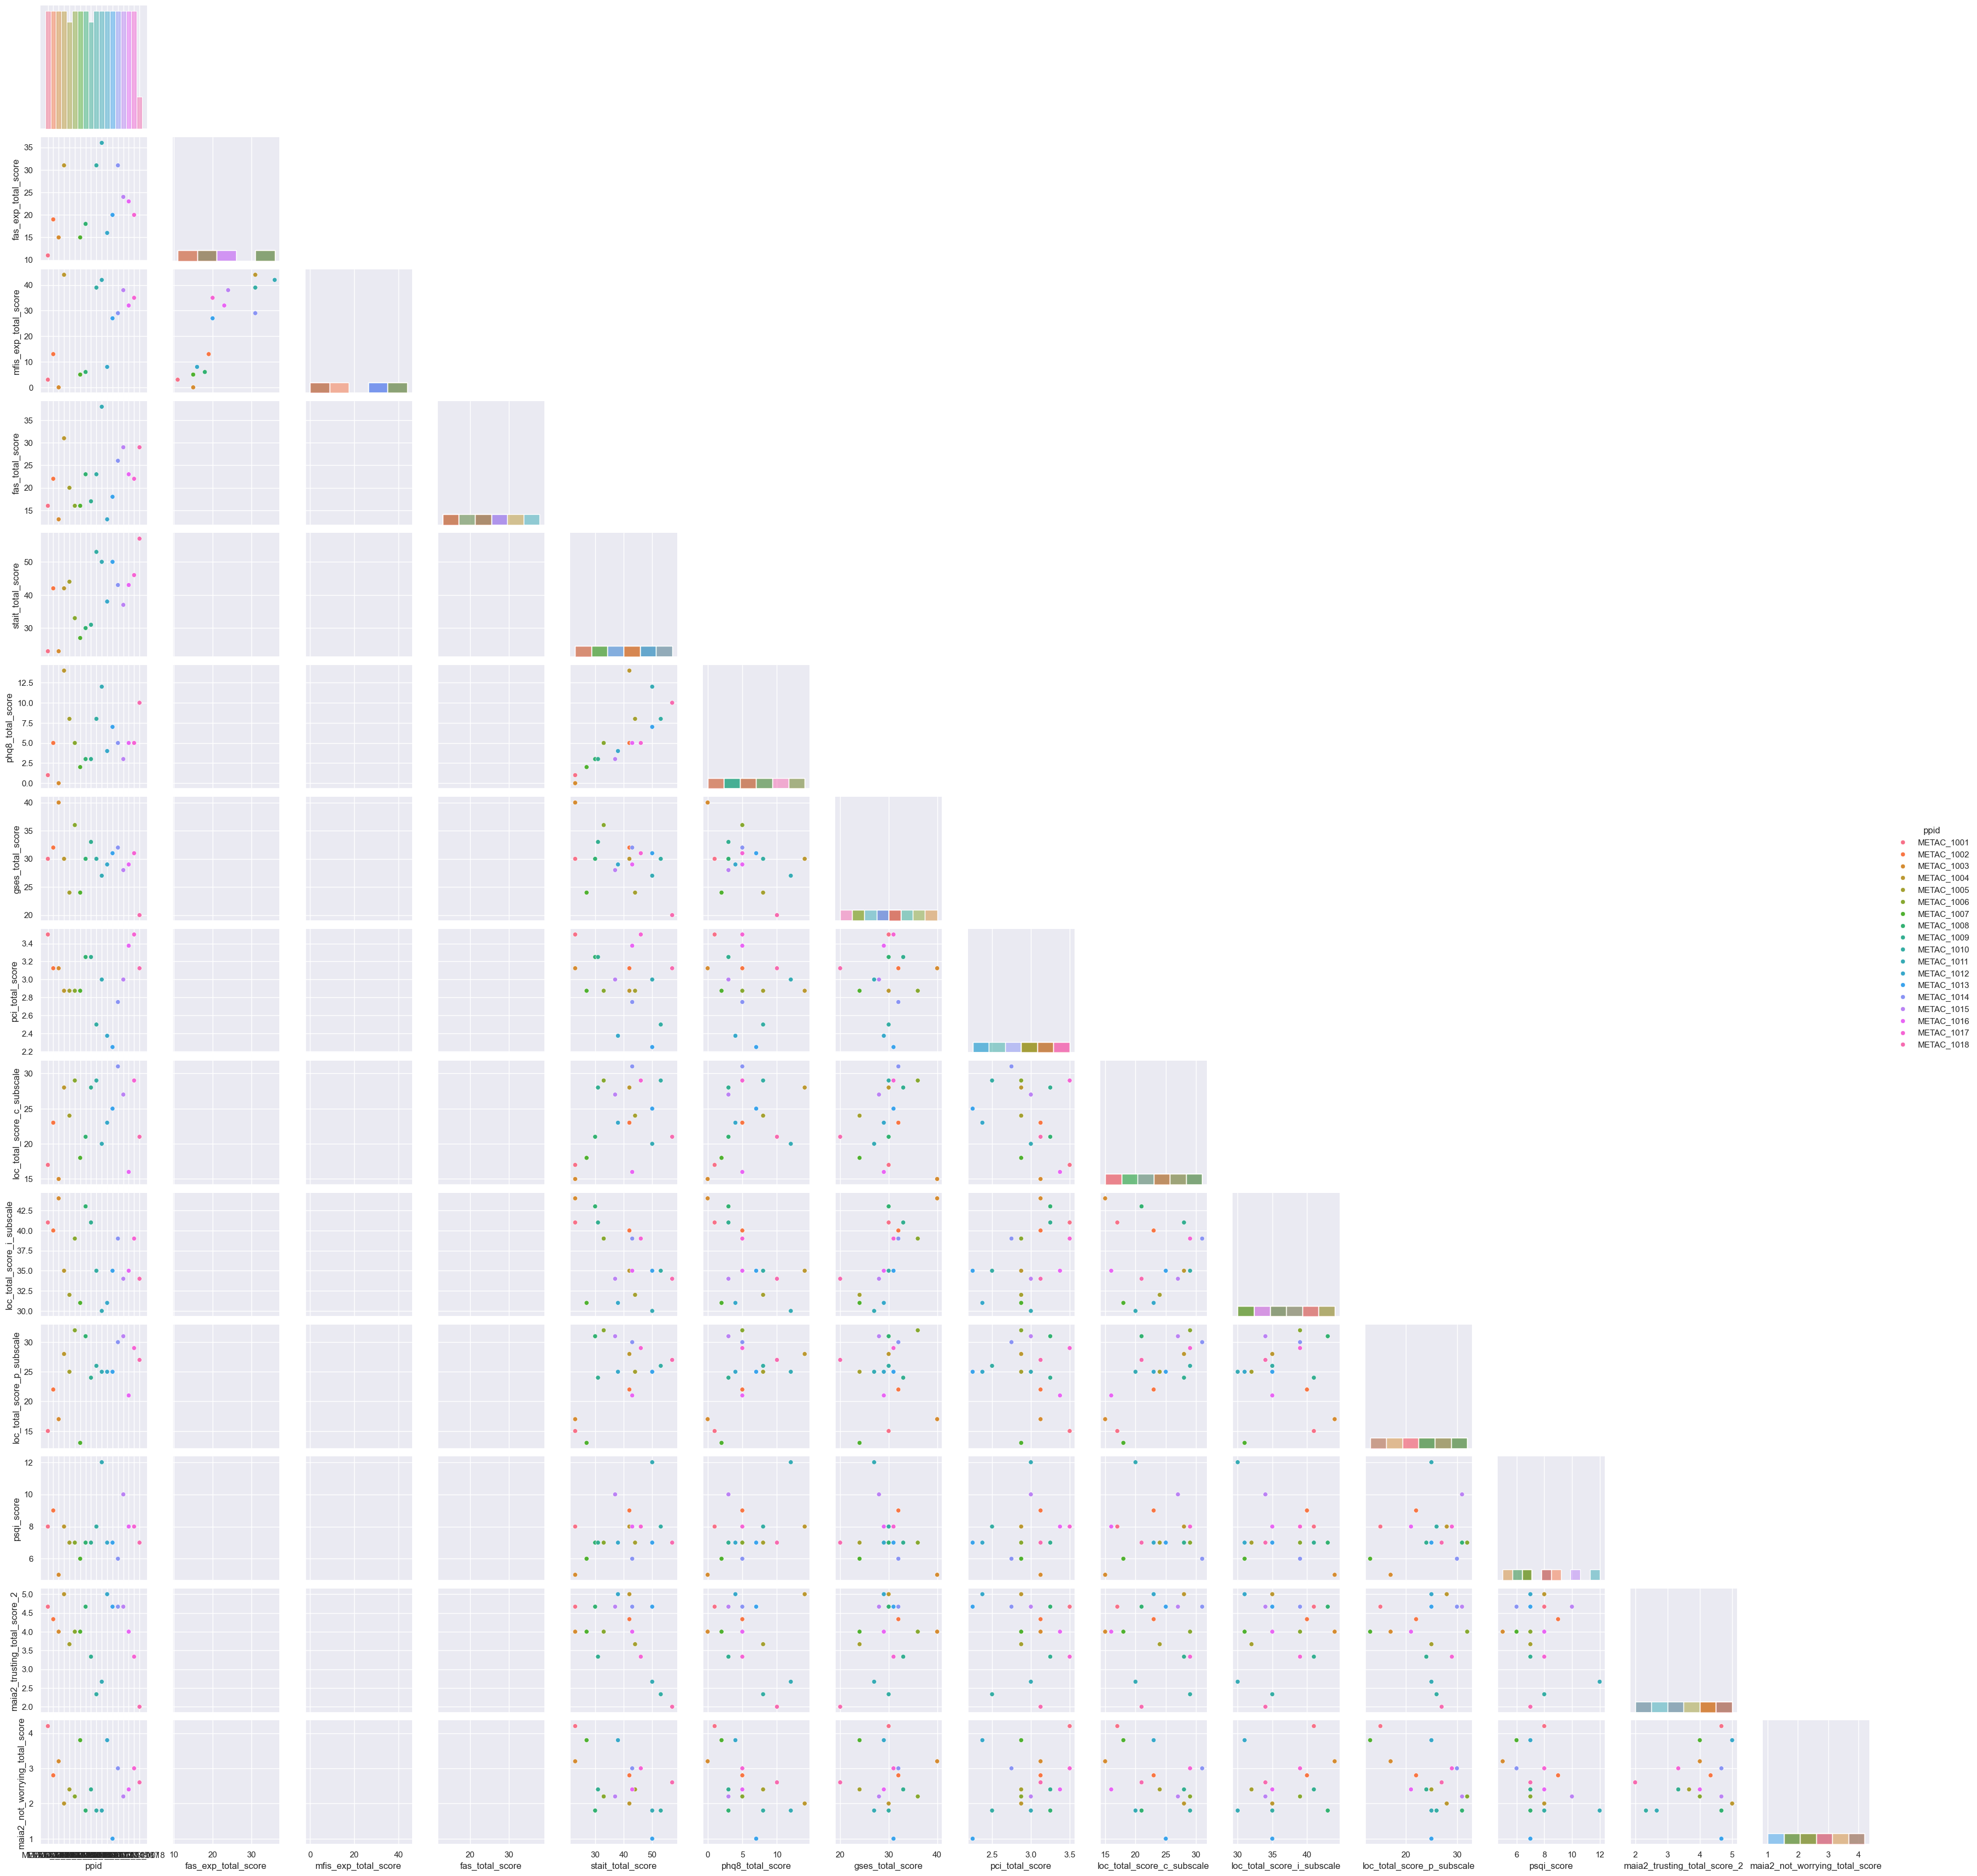

In [58]:
sns.pairplot(data=r_temp, vars=['ppid', 'fas_exp_total_score', 'mfis_exp_total_score', 'fas_total_score', 'stait_total_score', 'phq8_total_score',
                               'gses_total_score', 'pci_total_score', 'loc_total_score_c_subscale', 'loc_total_score_i_subscale', 'loc_total_score_p_subscale',
                               'psqi_score', 'maia2_trusting_total_score_2', 'maia2_not_worrying_total_score'], 
             hue='ppid', diag_kind="hist",
            corner=True)

In [68]:
r_temp['ppid']

0      METAC_1001
1      METAC_1001
2      METAC_1001
3      METAC_1001
4      METAC_1001
          ...    
105    METAC_1013
106    METAC_1013
107    METAC_1013
108    METAC_1013
109    METAC_1013
Name: ppid, Length: 110, dtype: object

&nbsp;
___
# pyHGF


In [5]:
from pyhgf import load_data
from pyhgf.distribution import HGFDistribution
from pyhgf.model import HGF
from pyhgf.response import first_level_binary_surprise

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [6]:
u, _ = load_data("binary")

In [9]:
two_levels_hgf = HGF(
    n_levels=2,
    model_type="binary",
    initial_mean={"1": 0.0, "2": 0.5},
    initial_precision={"1": 0.0, "2": 1.0},
    tonic_volatility={"2": -3.0},
)

In [11]:
# Provide new observations
two_levels_hgf = two_levels_hgf.input_data(input_data=u)

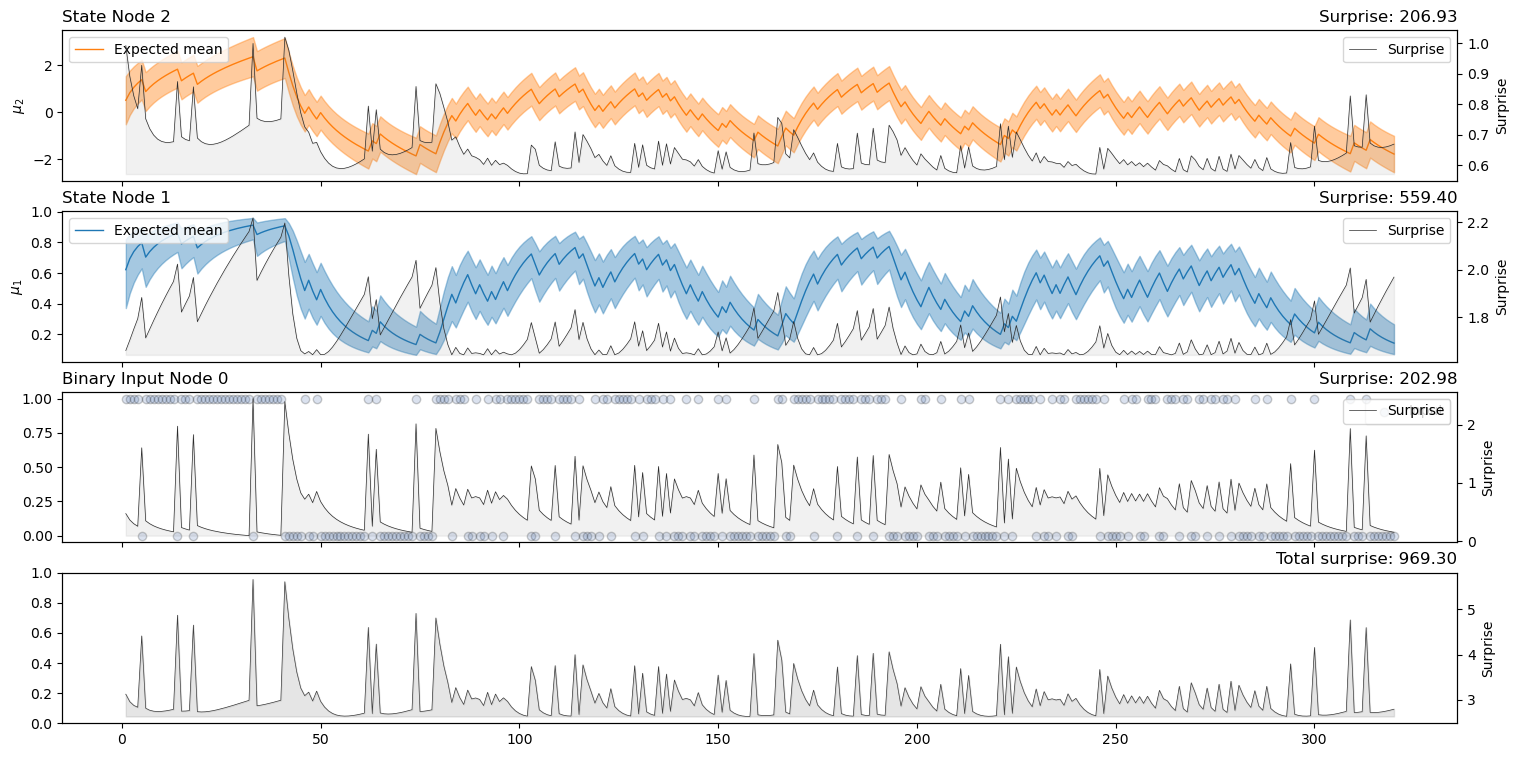

In [12]:
two_levels_hgf.plot_trajectories();

In [13]:
two_levels_hgf.surprise().sum()

Array(202.97632, dtype=float32)

In [16]:
with two_levels_hgf:
    two_level_hgf_idata = pm.sample(chains=2, cores=1)

TypeError: 'HGF' object does not support the context manager protocol